=== 改进的学生成绩影响因素分析 ===

数据集大小: (649, 34)
平均成绩: 11.63 ± 2.83
中位数成绩: 11.67

=== 特征工程 ===
新创建的特征:
  alcohol_total: 与成绩相关性 = -0.208
  study_absence_ratio: 与成绩相关性 = 0.227
  parent_edu_mean: 与成绩相关性 = 0.272
  academic_pressure: 与成绩相关性 = -0.368

=== 关键因素可视化 ===


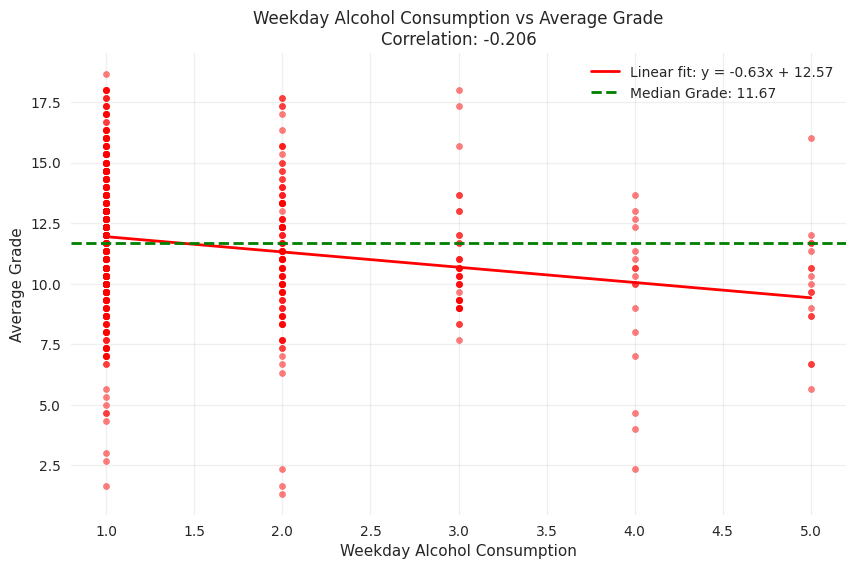

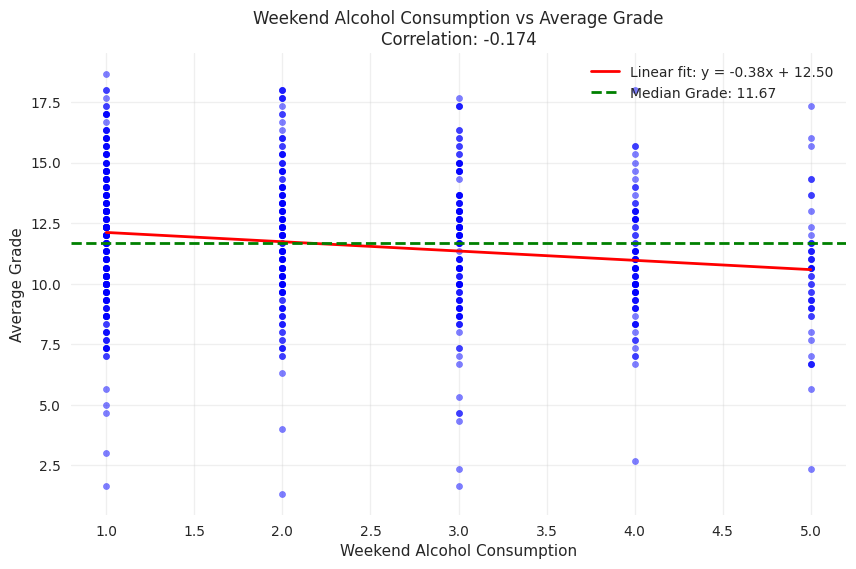

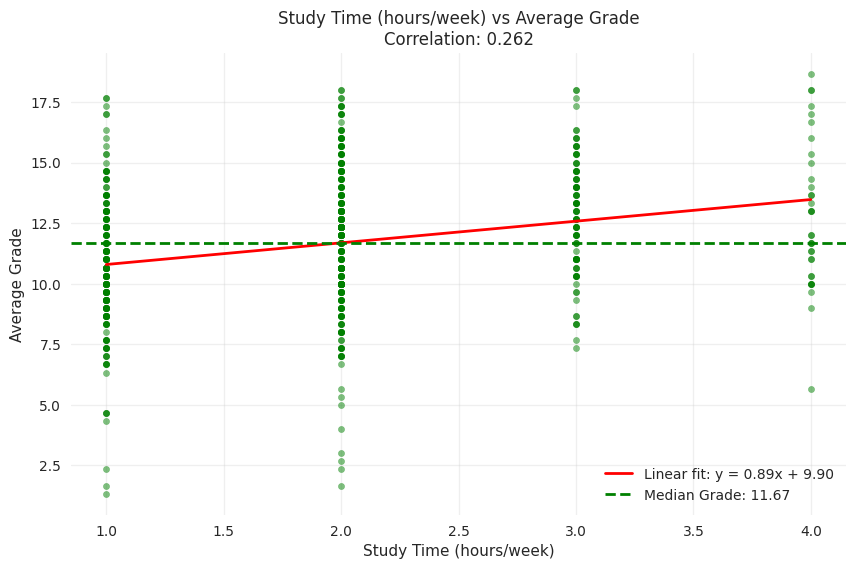

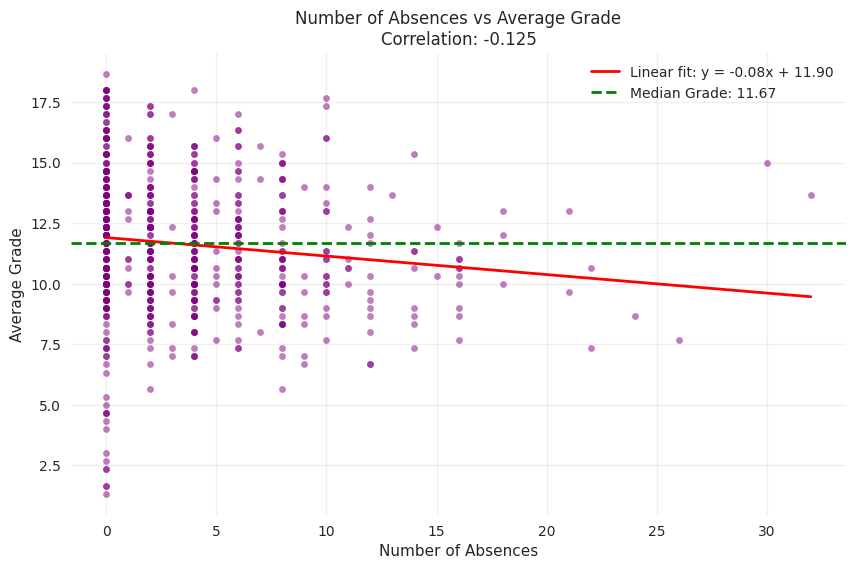

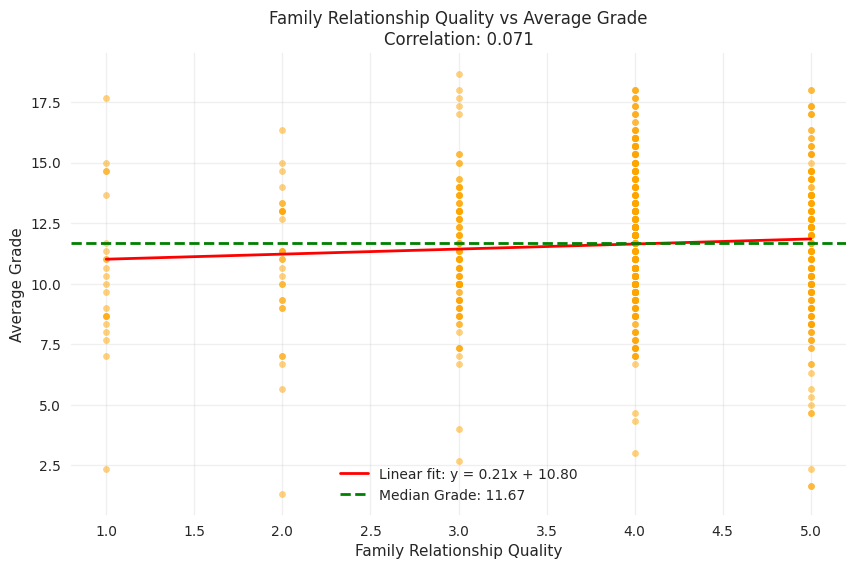

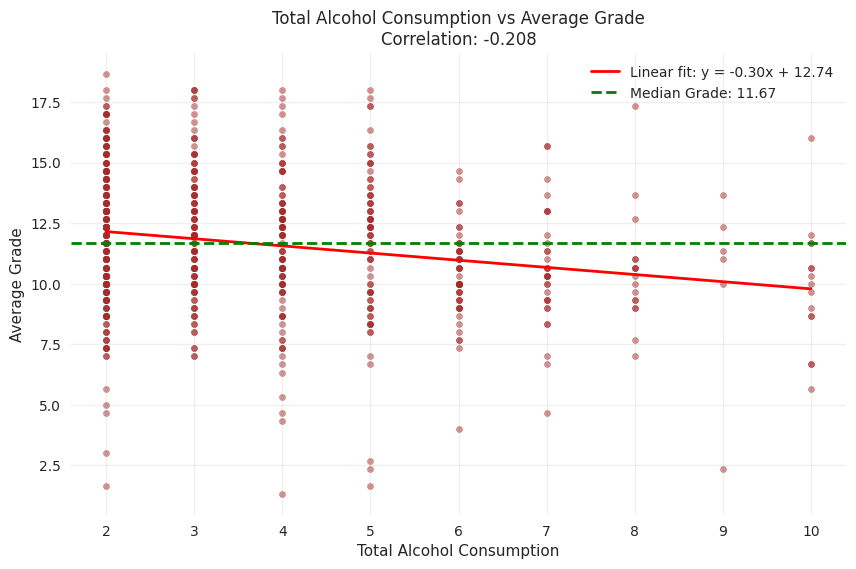

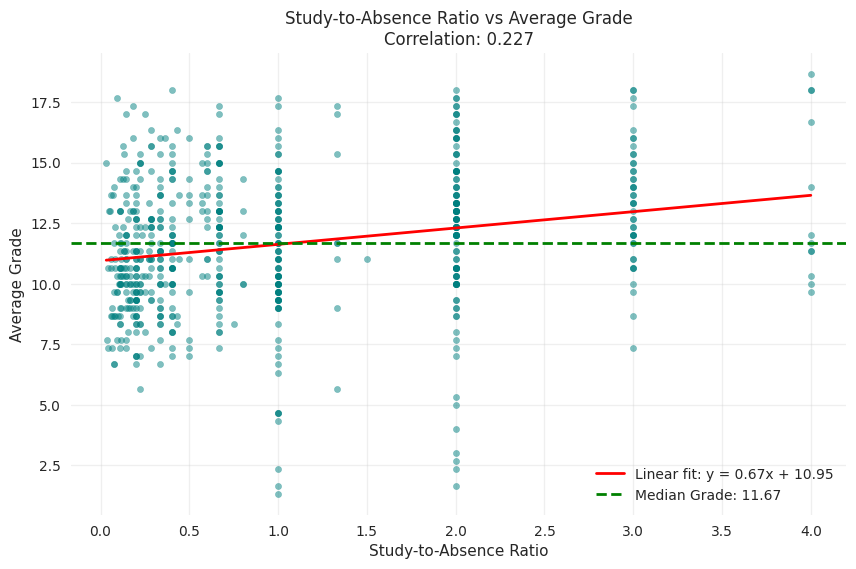

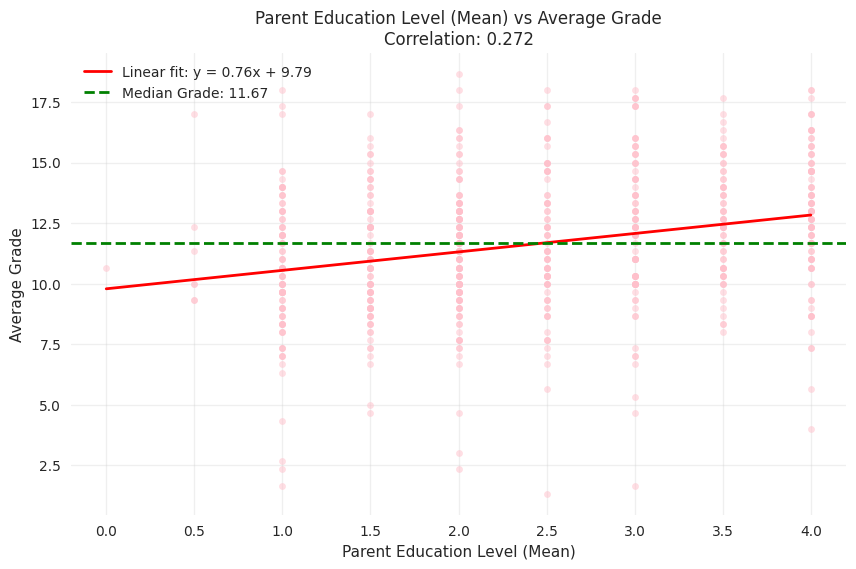

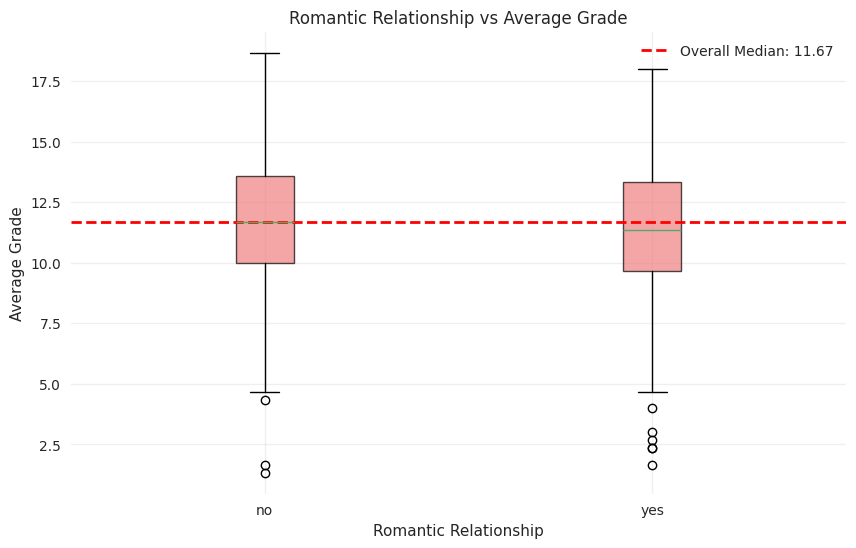


Romantic Relationship分组统计:
               mean     median  count
romantic                             
no        11.824390  11.666667    410
yes       11.283124  11.333333    239


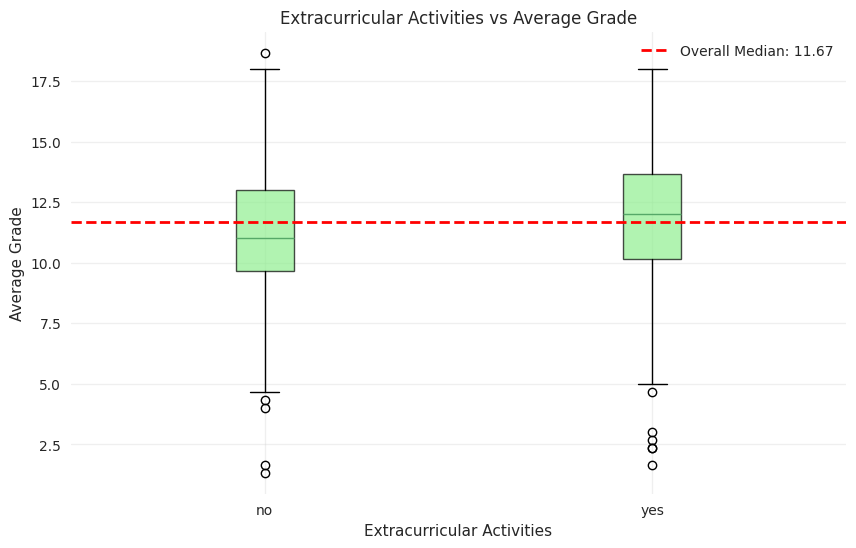


Extracurricular Activities分组统计:
                 mean  median  count
activities                          
no          11.428144    11.0    334
yes         11.833862    12.0    315


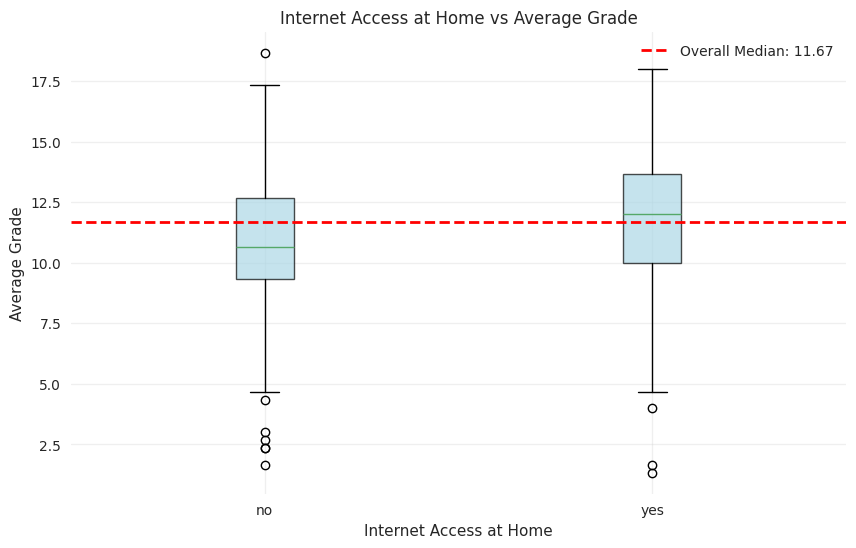


Internet Access at Home分组统计:
               mean     median  count
internet                             
no        10.838852  10.666667    151
yes       11.863454  12.000000    498


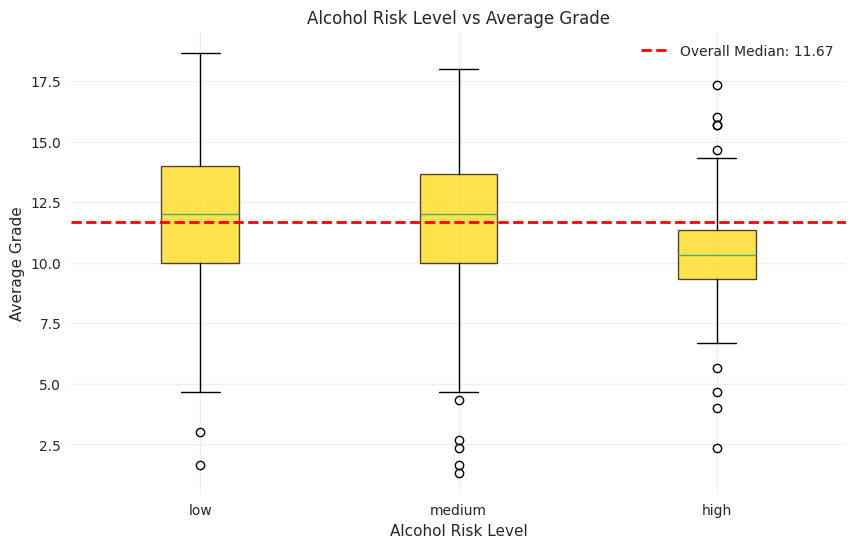


Alcohol Risk Level分组统计:
                   mean     median  count
alcohol_risk                             
high          10.372222  10.333333    120
low           12.005533  12.000000    241
medium        11.828704  12.000000    288


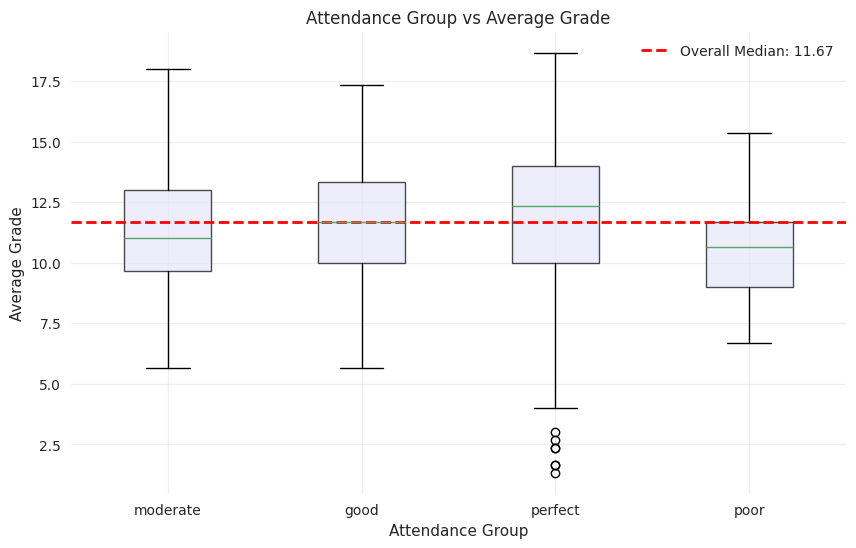


Attendance Group分组统计:
                       mean     median  count
attendance_group                             
good              11.770026  11.666667    129
moderate          11.443465  11.000000    227
perfect           11.949454  12.333333    244
poor              10.469388  10.666667     49

=== 改进的预测模型 ===
完整特征集形状: (649, 21)
选择的特征数量: 15
选中的特征: ['Dalc', 'Walc', 'studytime', 'absences', 'failures', 'freetime', 'Medu', 'Fedu', 'alcohol_total', 'study_absence_ratio', 'parent_edu_mean', 'academic_pressure', 'romantic_yes', 'internet_yes', 'higher_yes']

=== 模型比较 ===
Linear Regression:
  R² = 0.2084
  MSE = 6.7025
Ridge Regression:
  R² = 0.2085
  MSE = 6.7013
Lasso Regression:
  R² = 0.2000
  MSE = 6.7732
Random Forest:
  R² = 0.0628
  MSE = 7.9355

=== 交叉验证结果 ===
Ridge Regression 交叉验证 R²: 0.1667 (±0.0901)

=== 特征重要性分析 ===
Ridge Regression 特征系数:
                Feature  Coefficient  Absolute
4              failures    -0.881334  0.881334
14           higher_yes     0.520455  0.52045

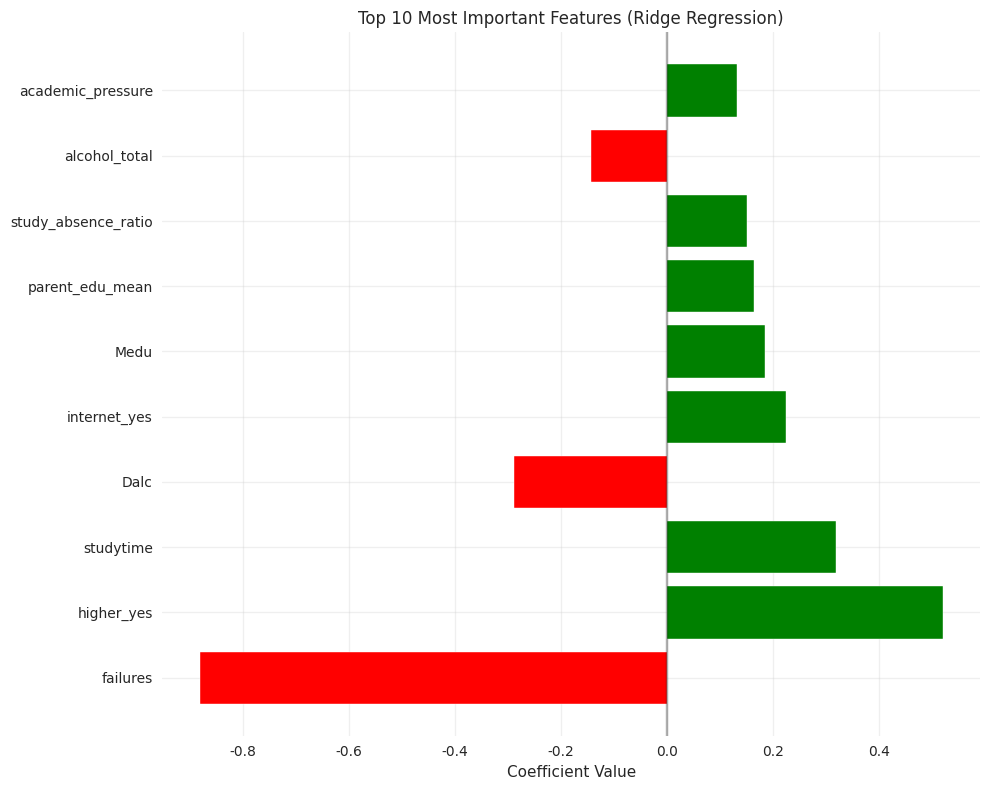


=== 最终模型评估 ===
最佳模型: Ridge Regression
完整数据集 R²: 0.3082
完整数据集 MSE: 5.5455


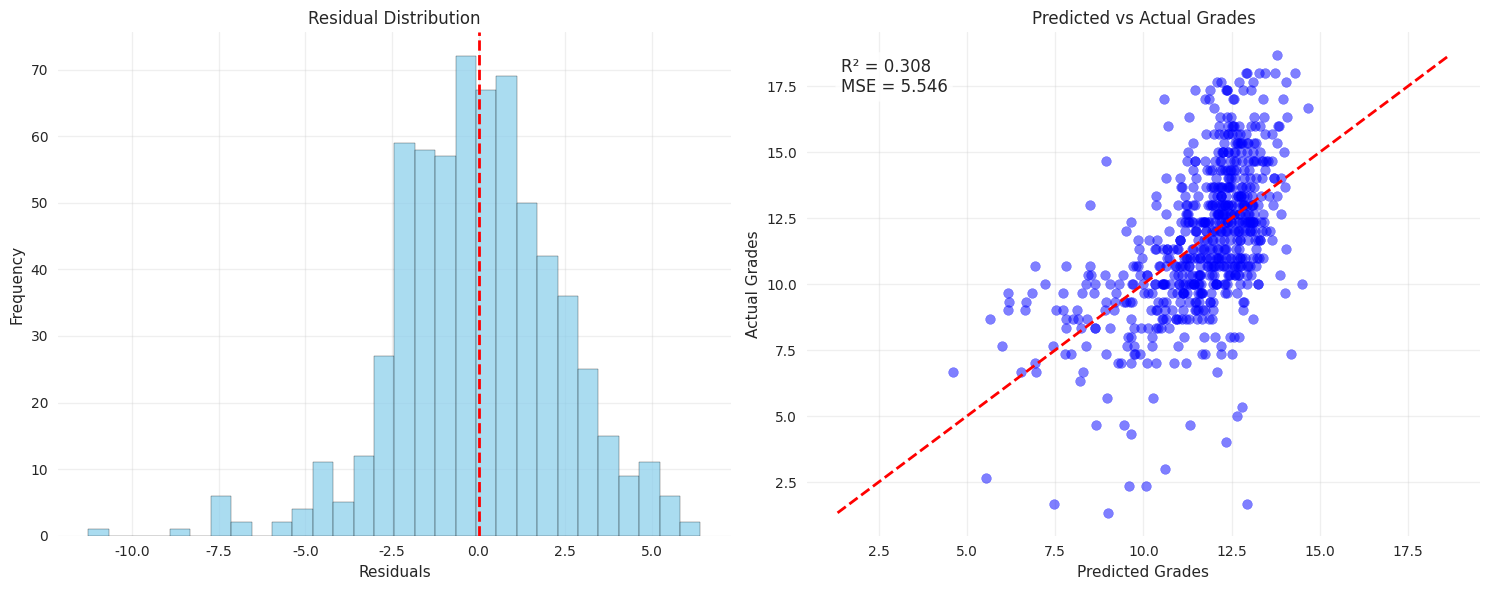


=== 预测函数测试 ===
案例1:
  特征 - 饮酒(D:1/W:1), 学习:3h, 缺勤:2次, 不及格:0次, 恋爱:no
  预测成绩: 12.7 → 低风险
案例2:
  特征 - 饮酒(D:4/W:5), 学习:1h, 缺勤:10次, 不及格:2次, 恋爱:yes
  预测成绩: 5.7 → 高风险
案例3:
  特征 - 饮酒(D:1/W:1), 学习:4h, 缺勤:0次, 不及格:0次, 恋爱:no
  预测成绩: 14.8 → 低风险

=== 综合相关性分析 ===


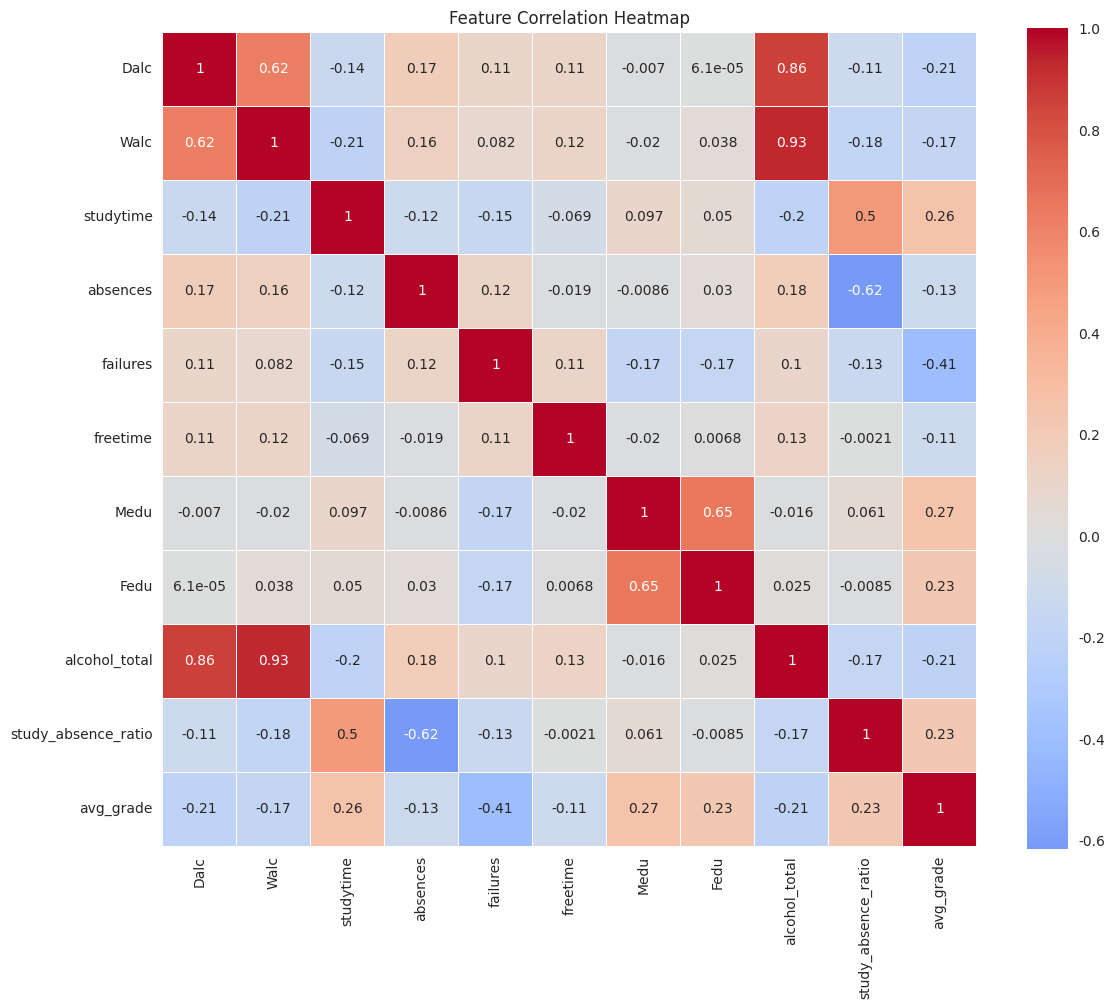


=== 分析总结 ===
最佳模型: Ridge Regression
模型解释力: 30.8%
平均预测误差: 2.35 分

最重要的影响因素:
  - failures: 负面影响 (系数: -0.881)
  - higher_yes: 正面影响 (系数: 0.520)
  - studytime: 正面影响 (系数: 0.318)
  - Dalc: 负面影响 (系数: -0.288)
  - internet_yes: 正面影响 (系数: 0.224)

改进效果:
1. 通过特征工程创建了更有意义的预测因子
2. 使用特征选择减少了过拟合
3. 比较了多种模型并选择了最佳性能模型
4. 提供了更准确的学生成绩预测


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# 设置字体
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('student-por.csv')

# 计算平均成绩
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

print("=== 改进的学生成绩影响因素分析 ===\n")
print(f"数据集大小: {df.shape}")
print(f"平均成绩: {df['avg_grade'].mean():.2f} ± {df['avg_grade'].std():.2f}")
print(f"中位数成绩: {df['avg_grade'].median():.2f}")

# 1. 特征工程 - 创建新特征
print("\n=== 特征工程 ===")

# 创建交互特征
df['alcohol_total'] = df['Dalc'] + df['Walc']  # 总饮酒量
df['study_absence_ratio'] = df['studytime'] / (df['absences'] + 1)  # 学习缺勤比
df['parent_edu_mean'] = (df['Medu'] + df['Fedu']) / 2  # 父母教育水平均值
df['academic_pressure'] = df['failures'] + (df['absences'] > 5).astype(int)  # 学业压力指数

# 创建分类特征
df['alcohol_risk'] = np.where(df['alcohol_total'] >= 6, 'high', 
                             np.where(df['alcohol_total'] >= 3, 'medium', 'low'))
df['attendance_group'] = np.where(df['absences'] == 0, 'perfect',
                                np.where(df['absences'] <= 3, 'good',
                                        np.where(df['absences'] <= 10, 'moderate', 'poor')))

print("新创建的特征:")
new_features = ['alcohol_total', 'study_absence_ratio', 'parent_edu_mean', 'academic_pressure']
for feature in new_features:
    corr = df[feature].corr(df['avg_grade'])
    print(f"  {feature}: 与成绩相关性 = {corr:.3f}")

# 2. 改进的可视化函数
def plot_factor_with_median(factor, data, title, xlabel, color='blue', is_categorical=False):
    """绘制因素与成绩的关系图，包含中位数线"""
    plt.figure(figsize=(10, 6))
    
    if is_categorical:
        # 分类变量使用箱线图
        grouped_data = []
        labels = []
        for category in data[factor].unique():
            category_data = data[data[factor] == category]['avg_grade']
            grouped_data.append(category_data)
            labels.append(str(category))
        
        box = plt.boxplot(grouped_data, labels=labels, patch_artist=True)
        # 设置颜色
        for patch in box['boxes']:
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # 添加中位数线
        overall_median = data['avg_grade'].median()
        plt.axhline(y=overall_median, color='red', linestyle='--', linewidth=2, 
                   label=f'Overall Median: {overall_median:.2f}')
        
    else:
        # 连续变量使用散点图和拟合线
        plt.scatter(data[factor], data['avg_grade'], alpha=0.5, color=color, s=20)
        
        # 线性拟合
        mask = ~(data[factor].isna() | data['avg_grade'].isna())
        if mask.sum() > 1:
            x_vals = data[factor][mask]
            y_vals = data['avg_grade'][mask]
            
            # 线性拟合
            z_linear = np.polyfit(x_vals, y_vals, 1)
            p_linear = np.poly1d(z_linear)
            x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
            plt.plot(x_range, p_linear(x_range), 'r-', linewidth=2, 
                    label=f'Linear fit: y = {z_linear[0]:.2f}x + {z_linear[1]:.2f}')
            
            # 计算相关性
            corr = x_vals.corr(y_vals)
            title += f'\nCorrelation: {corr:.3f}'
        
        # 添加中位数线
        overall_median = data['avg_grade'].median()
        plt.axhline(y=overall_median, color='green', linestyle='--', linewidth=2, 
                   label=f'Median Grade: {overall_median:.2f}')
    
    plt.xlabel(xlabel)
    plt.ylabel('Average Grade')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return corr if not is_categorical else None

# 3. 绘制改进的图表
print("\n=== 关键因素可视化 ===")

factors_to_plot = [
    ('Dalc', 'Weekday Alcohol Consumption', 'red'),
    ('Walc', 'Weekend Alcohol Consumption', 'blue'), 
    ('studytime', 'Study Time (hours/week)', 'green'),
    ('absences', 'Number of Absences', 'purple'),
    ('famrel', 'Family Relationship Quality', 'orange'),
    ('alcohol_total', 'Total Alcohol Consumption', 'brown'),
    ('study_absence_ratio', 'Study-to-Absence Ratio', 'teal'),
    ('parent_edu_mean', 'Parent Education Level (Mean)', 'pink')
]

correlations = {}
for factor, label, color in factors_to_plot:
    if factor in df.columns:
        corr = plot_factor_with_median(factor, df, f'{label} vs Average Grade', label, color)
        if corr is not None:
            correlations[factor] = corr

# 4. 分类变量的可视化
categorical_factors = [
    ('romantic', 'Romantic Relationship', 'lightcoral'),
    ('activities', 'Extracurricular Activities', 'lightgreen'),
    ('internet', 'Internet Access at Home', 'lightblue'),
    ('alcohol_risk', 'Alcohol Risk Level', 'gold'),
    ('attendance_group', 'Attendance Group', 'lavender')
]

for factor, label, color in categorical_factors:
    if factor in df.columns:
        plot_factor_with_median(factor, df, f'{label} vs Average Grade', label, color, True)
        
        # 计算分组统计
        group_stats = df.groupby(factor)['avg_grade'].agg(['mean', 'median', 'count'])
        print(f"\n{label}分组统计:")
        print(group_stats)

# 5. 改进的模型构建
print("\n=== 改进的预测模型 ===")

# 准备特征集
base_features = ['Dalc', 'Walc', 'studytime', 'absences', 'famrel', 'health', 
                'failures', 'goout', 'freetime', 'Medu', 'Fedu']

# 添加工程特征
engineered_features = ['alcohol_total', 'study_absence_ratio', 'parent_edu_mean', 'academic_pressure']

# 分类特征的虚拟变量
categorical_dummies = ['romantic', 'activities', 'internet', 'higher', 'famsup', 'schoolsup']

# 创建完整特征集
X_full = df[base_features + engineered_features].copy()
for cat_feat in categorical_dummies:
    if cat_feat in df.columns:
        dummies = pd.get_dummies(df[cat_feat], prefix=cat_feat, drop_first=True)
        X_full = pd.concat([X_full, dummies], axis=1)

y = df['avg_grade']

print(f"完整特征集形状: {X_full.shape}")

# 特征选择
selector = SelectKBest(score_func=f_regression, k=15)
X_selected = selector.fit_transform(X_full, y)
selected_mask = selector.get_support()
selected_features = X_full.columns[selected_mask]

print(f"选择的特征数量: {len(selected_features)}")
print("选中的特征:", list(selected_features))

X_final = X_full[selected_features]

# 6. 多种模型比较
print("\n=== 模型比较 ===")

# 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    if name == 'Random Forest':
        # 随机森林不需要标准化
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R2': r2, 'MSE': mse}
    
    print(f"{name}:")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

# 7. 交叉验证
print("\n=== 交叉验证结果 ===")
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]

if best_model_name == 'Random Forest':
    cv_scores = cross_val_score(best_model, X_final, y, cv=5, scoring='r2')
else:
    X_full_scaled = scaler.fit_transform(X_final)
    cv_scores = cross_val_score(best_model, X_full_scaled, y, cv=5, scoring='r2')

print(f"{best_model_name} 交叉验证 R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# 8. 特征重要性分析
print("\n=== 特征重要性分析 ===")

if best_model_name == 'Random Forest':
    # 随机森林的特征重要性
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("随机森林特征重要性:")
    print(feature_importance_df.head(10))
    
    # 可视化特征重要性
    plt.figure(figsize=(10, 8))
    top_features = feature_importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Most Important Features (Random Forest)')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    # 线性模型的系数
    if best_model_name != 'Random Forest':
        coefficients = best_model.coef_
        coef_df = pd.DataFrame({
            'Feature': selected_features,
            'Coefficient': coefficients,
            'Absolute': np.abs(coefficients)
        }).sort_values('Absolute', ascending=False)
        
        print(f"{best_model_name} 特征系数:")
        print(coef_df.head(10))
        
        # 可视化系数
        plt.figure(figsize=(10, 8))
        top_coef = coef_df.head(10)
        colors = ['red' if x < 0 else 'green' for x in top_coef['Coefficient']]
        plt.barh(range(len(top_coef)), top_coef['Coefficient'], color=colors)
        plt.yticks(range(len(top_coef)), top_coef['Feature'])
        plt.xlabel('Coefficient Value')
        plt.title(f'Top 10 Most Important Features ({best_model_name})')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# 9. 最终模型评估
print("\n=== 最终模型评估 ===")

# 使用最佳模型进行完整训练
if best_model_name == 'Random Forest':
    best_model.fit(X_final, y)
    y_full_pred = best_model.predict(X_final)
else:
    X_full_scaled = scaler.fit_transform(X_final)
    best_model.fit(X_full_scaled, y)
    y_full_pred = best_model.predict(X_full_scaled)

final_r2 = r2_score(y, y_full_pred)
final_mse = mean_squared_error(y, y_full_pred)

print(f"最佳模型: {best_model_name}")
print(f"完整数据集 R²: {final_r2:.4f}")
print(f"完整数据集 MSE: {final_mse:.4f}")

# 残差分析
residuals = y - y_full_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 残差分布
axes[0].hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residual Distribution')
axes[0].grid(True, alpha=0.3)

# 预测 vs 实际值
axes[1].scatter(y_full_pred, y, alpha=0.5, color='blue')
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[1].set_xlabel('Predicted Grades')
axes[1].set_ylabel('Actual Grades')
axes[1].set_title('Predicted vs Actual Grades')
axes[1].grid(True, alpha=0.3)

# 添加统计信息
axes[1].text(0.05, 0.95, f'R² = {final_r2:.3f}\nMSE = {final_mse:.3f}', 
            transform=axes[1].transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# 10. 创建实用的预测函数
def predict_student_performance(Dalc=1, Walc=1, studytime=2, absences=0, failures=0,
                              famrel=4, Medu=2, Fedu=2, romantic='no', 
                              activities='no', internet='yes', higher='yes'):
    """改进的学生成绩预测函数"""
    
    # 计算工程特征
    alcohol_total = Dalc + Walc
    study_absence_ratio = studytime / (absences + 1)
    parent_edu_mean = (Medu + Fedu) / 2
    academic_pressure = failures + (1 if absences > 5 else 0)
    
    # 准备输入数据
    input_data = {
        'Dalc': Dalc, 'Walc': Walc, 'studytime': studytime, 
        'absences': absences, 'failures': failures, 'famrel': famrel,
        'Medu': Medu, 'Fedu': Fedu, 'alcohol_total': alcohol_total,
        'study_absence_ratio': study_absence_ratio, 
        'parent_edu_mean': parent_edu_mean,
        'academic_pressure': academic_pressure,
        'goout': 3, 'freetime': 3, 'health': 4,  # 默认值
        'romantic_yes': 1 if romantic == 'yes' else 0,
        'activities_yes': 1 if activities == 'yes' else 0,
        'internet_yes': 1 if internet == 'yes' else 0,
        'higher_yes': 1 if higher == 'yes' else 0
    }
    
    # 创建DataFrame，确保包含所有选中的特征
    input_df = pd.DataFrame([input_data])
    
    # 只保留选中的特征
    for feature in selected_features:
        if feature not in input_df.columns:
            input_df[feature] = 0  # 默认值
    
    input_df = input_df[selected_features]
    
    # 预测
    if best_model_name == 'Random Forest':
        predicted_grade = best_model.predict(input_df)[0]
    else:
        input_scaled = scaler.transform(input_df)
        predicted_grade = best_model.predict(input_scaled)[0]
    
    return max(0, min(20, predicted_grade))

# 测试预测函数
print("\n=== 预测函数测试 ===")
test_cases = [
    {"Dalc": 1, "Walc": 1, "studytime": 3, "absences": 2, "failures": 0, 
     "romantic": "no", "internet": "yes", "higher": "yes"},
    {"Dalc": 4, "Walc": 5, "studytime": 1, "absences": 10, "failures": 2, 
     "romantic": "yes", "internet": "no", "higher": "no"},
    {"Dalc": 1, "Walc": 1, "studytime": 4, "absences": 0, "failures": 0, 
     "romantic": "no", "internet": "yes", "higher": "yes", "Medu": 4, "Fedu": 4}
]

for i, case in enumerate(test_cases, 1):
    grade = predict_student_performance(**case)
    risk_level = "低风险" if grade >= 12 else "中风险" if grade >= 10 else "高风险"
    
    print(f"案例{i}:")
    print(f"  特征 - 饮酒(D:{case['Dalc']}/W:{case['Walc']}), "
          f"学习:{case['studytime']}h, 缺勤:{case['absences']}次, "
          f"不及格:{case['failures']}次, 恋爱:{case['romantic']}")
    print(f"  预测成绩: {grade:.1f} → {risk_level}")

# 11. 综合相关性热图
print("\n=== 综合相关性分析 ===")

# 选择最重要的特征进行相关性分析
important_features = list(selected_features[:10]) + ['avg_grade']
corr_matrix = df[important_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

print("\n=== 分析总结 ===")
print(f"最佳模型: {best_model_name}")
print(f"模型解释力: {final_r2:.1%}")
print(f"平均预测误差: {np.sqrt(final_mse):.2f} 分")

print("\n最重要的影响因素:")
if best_model_name == 'Random Forest':
    top_factors = feature_importance_df.head(5)
    for _, row in top_factors.iterrows():
        print(f"  - {row['Feature']}: {row['Importance']:.3f}")
else:
    top_factors = coef_df.head(5)
    for _, row in top_factors.iterrows():
        effect = "负面" if row['Coefficient'] < 0 else "正面"
        print(f"  - {row['Feature']}: {effect}影响 (系数: {row['Coefficient']:.3f})")

print("\n改进效果:")
print("1. 通过特征工程创建了更有意义的预测因子")
print("2. 使用特征选择减少了过拟合")
print("3. 比较了多种模型并选择了最佳性能模型")
print("4. 提供了更准确的学生成绩预测")

=== 高级学生成绩影响因素分析 (改进版) ===

数据集大小: (649, 34)
平均成绩: 11.63 ± 2.83
中位数成绩: 11.67

=== 高级特征工程 ===
新创建的高级特征:
  alcohol_frequency: 相关性 = -0.198
  study_efficiency: 相关性 = 0.227
  parent_edu_score: 相关性 = 0.275
  academic_risk: 相关性 = -0.328
  social_activity: 相关性 = -0.120
  family_support: 相关性 = 0.083
  school_support: 相关性 = -0.081
  motivation: 相关性 = 0.225
  alcohol_study_interaction: 相关性 = -0.263
  absence_failure_interaction: 相关性 = -0.233
  support_motivation_interaction: 相关性 = 0.209

=== 深入数据探索 ===


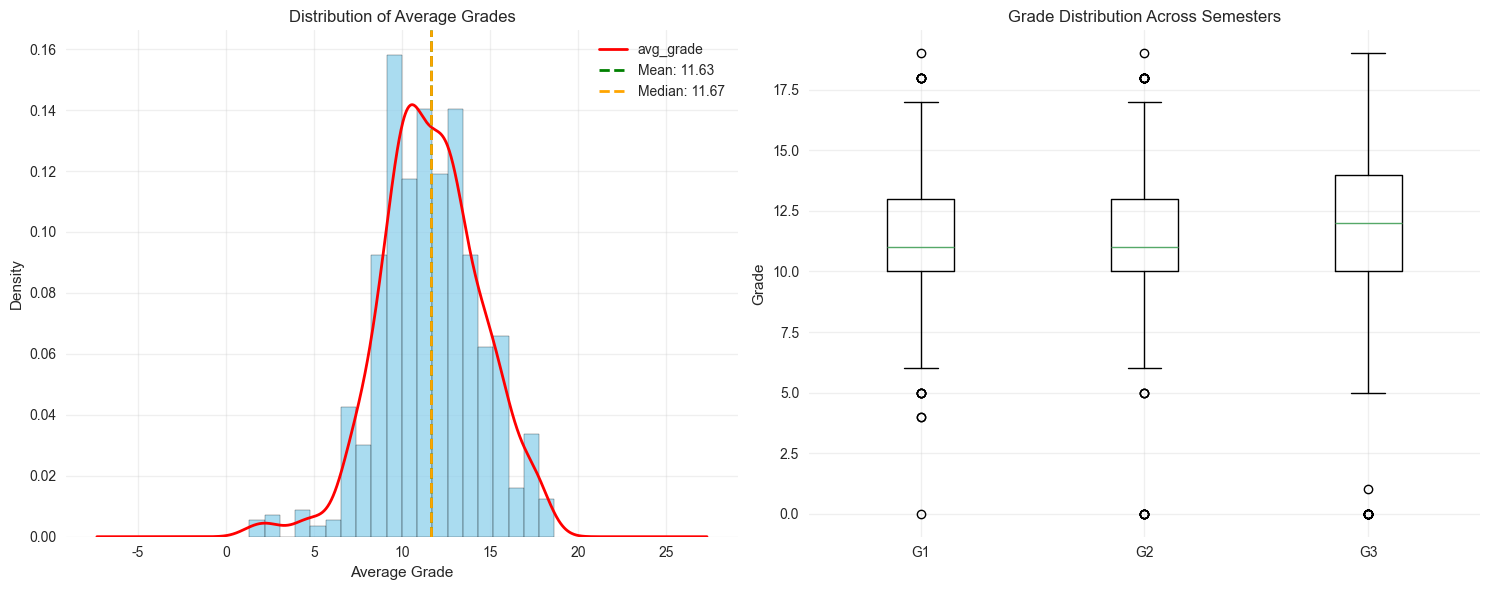


=== 高级特征选择 ===
初始特征数量: 31
选择的特征数量: 20
选中的特征: ['Dalc', 'absences', 'famrel', 'health', 'failures', 'goout', 'freetime', 'Medu', 'Fedu', 'traveltime', 'alcohol_frequency', 'study_efficiency', 'parent_edu_score', 'social_activity', 'family_support', 'school_support', 'motivation', 'alcohol_study_interaction', 'support_motivation_interaction', 'higher_yes']

=== 高级模型比较 ===

训练 Linear Regression...
  R² = 0.2977
  RMSE = 2.3945
  MAE = 1.8469

训练 Ridge Regression...
  最佳参数: {'alpha': 100.0}
  R² = 0.2946
  RMSE = 2.3997
  MAE = 1.8464

训练 Lasso Regression...
  最佳参数: {'alpha': 0.1}
  R² = 0.3044
  RMSE = 2.3830
  MAE = 1.8183

训练 ElasticNet...
  最佳参数: {'alpha': 0.1, 'l1_ratio': 0.9}
  R² = 0.3040
  RMSE = 2.3836
  MAE = 1.8187

训练 Random Forest...
  最佳参数: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
  R² = 0.3222
  RMSE = 2.3523
  MAE = 1.8155

训练 Gradient Boosting...
  最佳参数: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
  R² = 0.3639
  RMSE = 2.2788
  MAE =

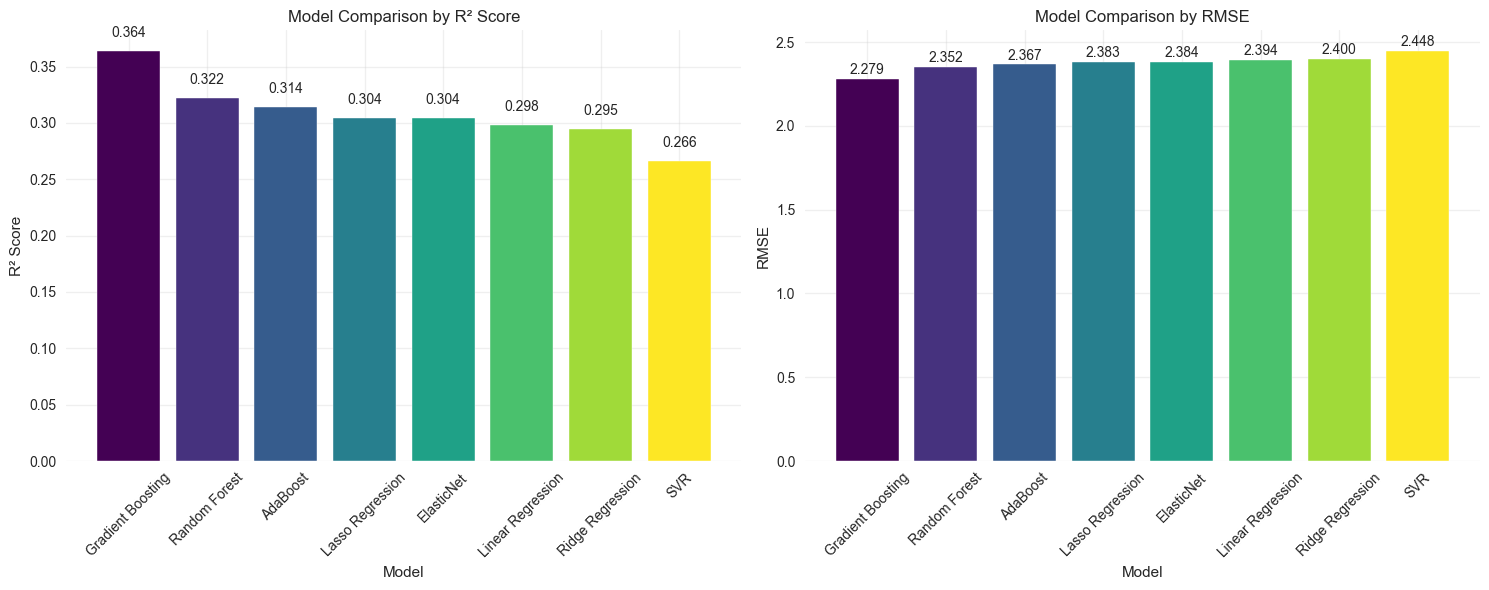


最佳模型: Gradient Boosting
完整数据集性能:
  R² = 0.5391
  RMSE = 1.9220
  MAE = 1.4918

=== 特征重要性分析 ===
特征重要性:
                           Feature  Importance
4                         failures    0.354654
17       alcohol_study_interaction    0.097038
11                study_efficiency    0.087784
12                parent_edu_score    0.062134
19                      higher_yes    0.058219
16                      motivation    0.046927
15                  school_support    0.033856
18  support_motivation_interaction    0.033488
13                 social_activity    0.030673
9                       traveltime    0.027607


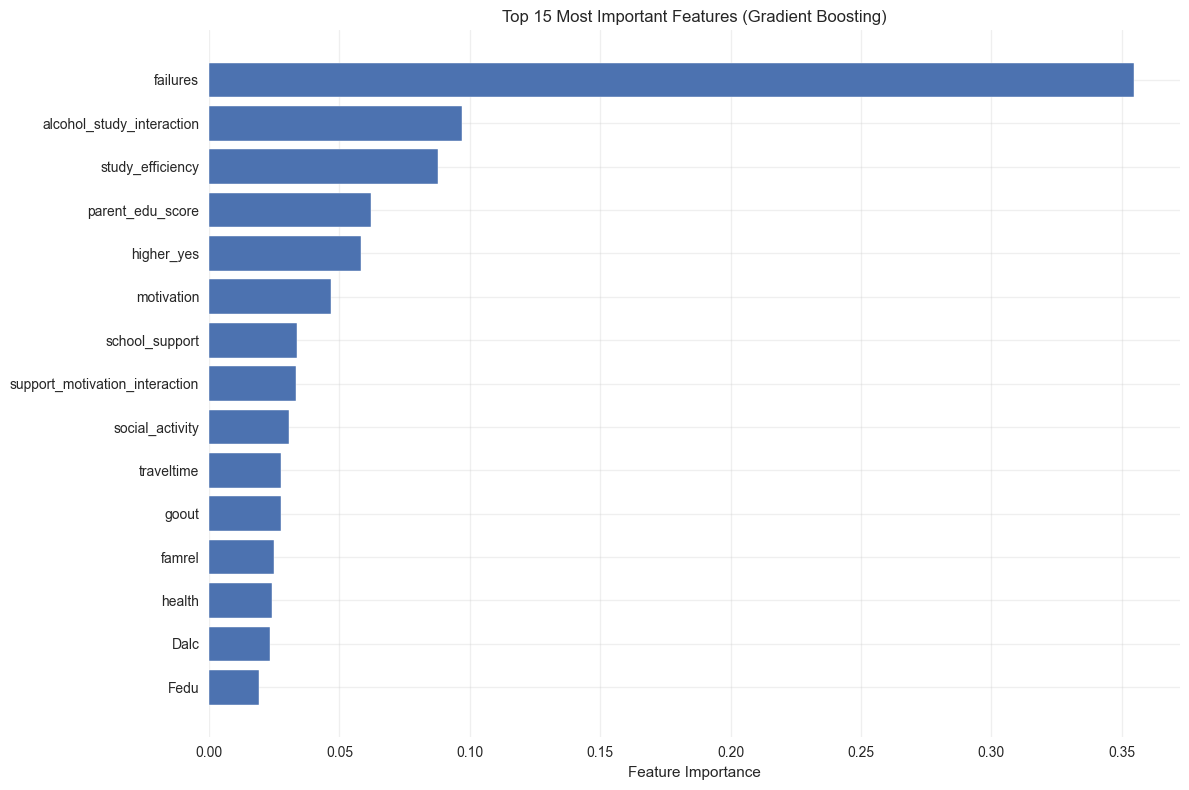


=== 模型诊断 ===


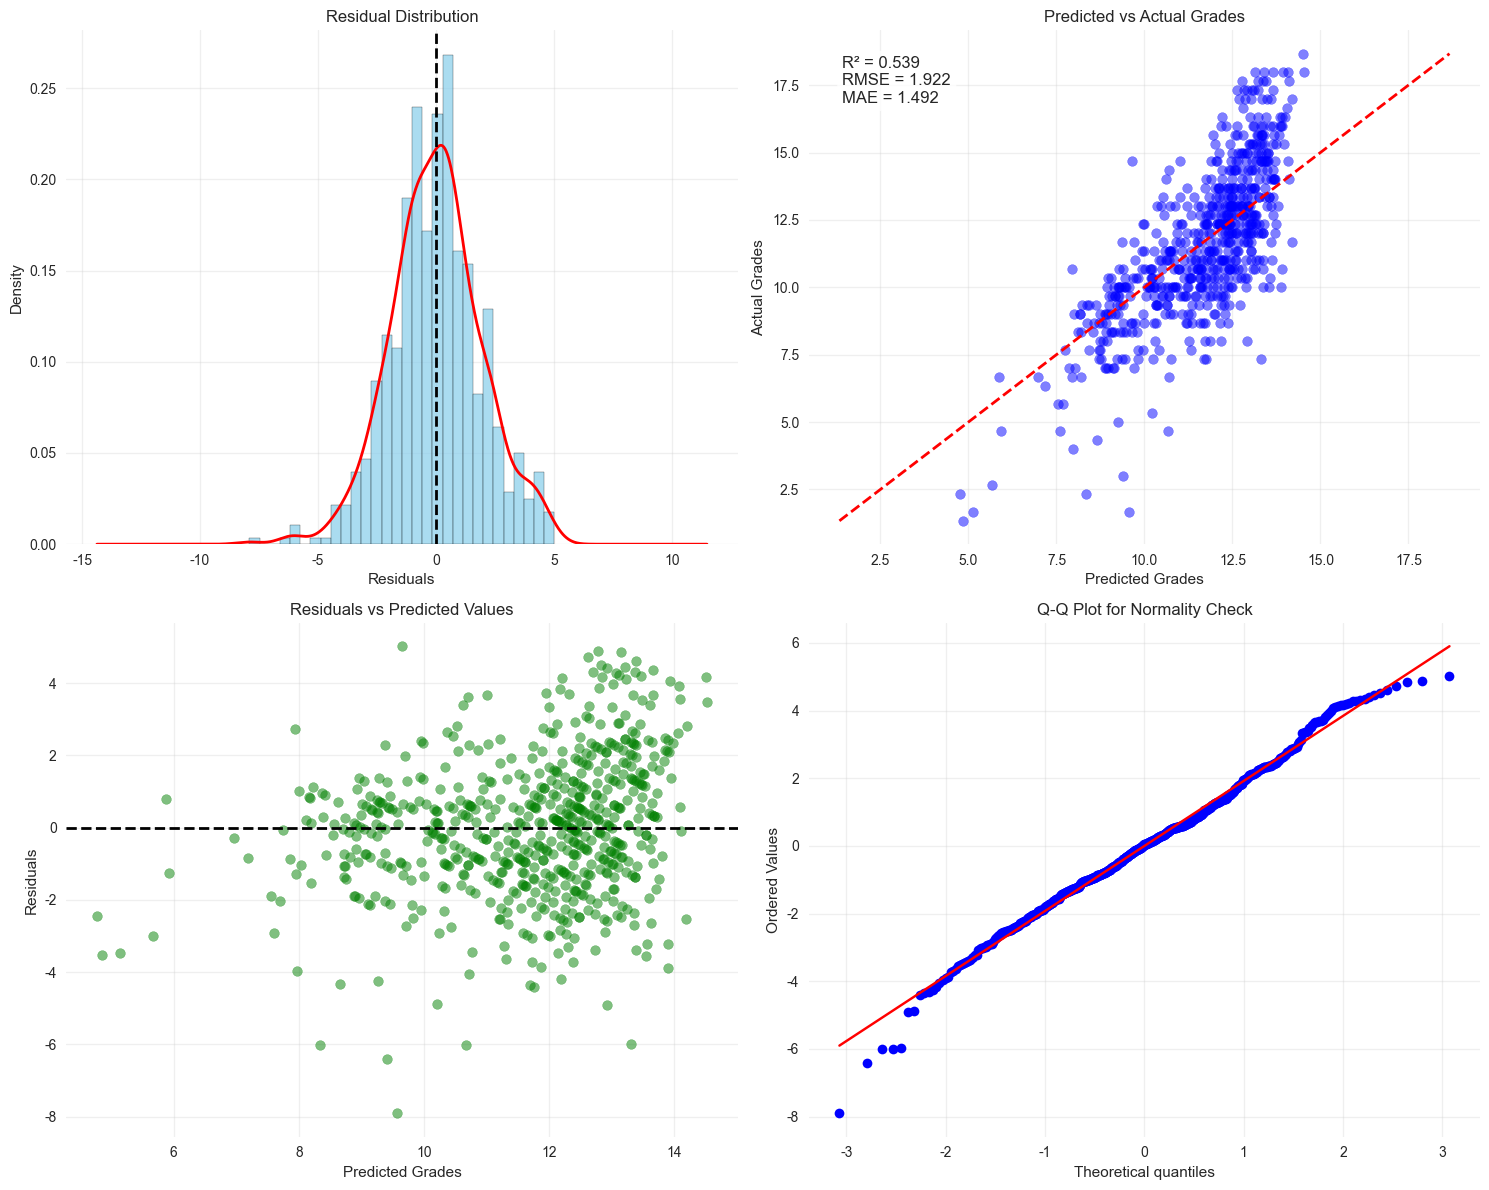


=== 多因素交互分析 ===


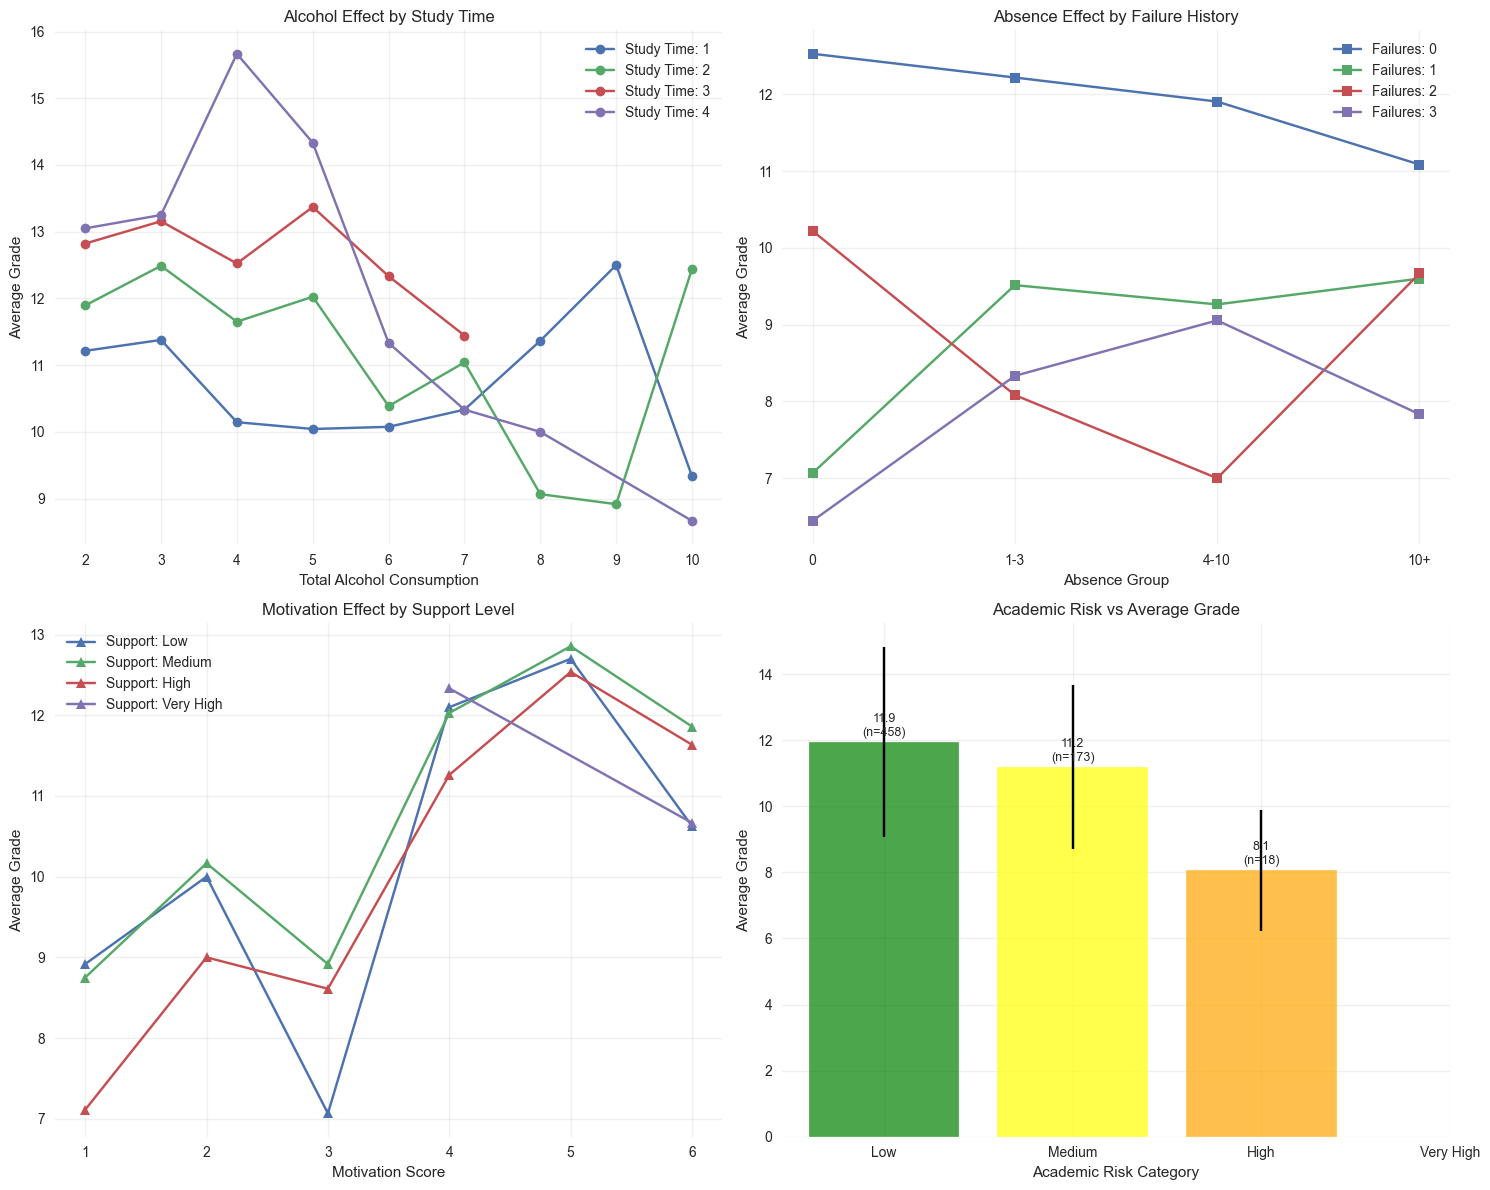


=== 学生分群分析 ===
学生分群分析:
                      avg_grade           predicted_grade            \
                           mean       std            mean       std   
performance_category                                                  
Underpredicted         8.244444  2.424284       11.305704  2.005011   
Accurate              11.419565  1.971856       11.472041  1.596428   
Overpredicted         15.653199  1.564863       12.626410  1.216389   

                     prediction_error           total_alcohol studytime  \
                                 mean       std          mean      mean   
performance_category                                                      
Underpredicted              -3.061260  1.101858      3.566667  1.844444   
Accurate                    -0.052475  1.007709      3.889130  1.917391   
Overpredicted                3.026788  0.854966      3.484848  2.070707   

                      absences  failures family_support motivation  
                          mea

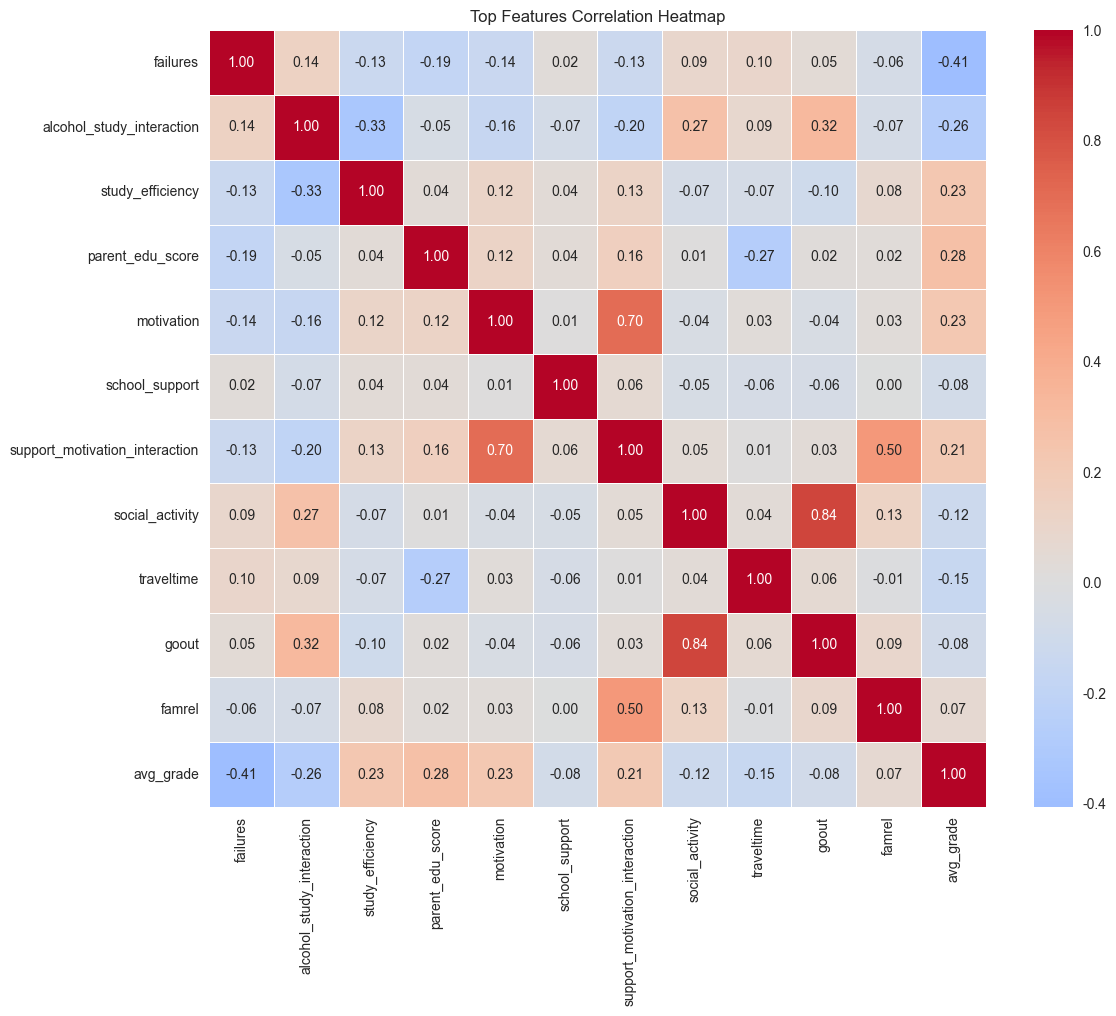


最终分析总结

模型性能:
  最佳模型: Gradient Boosting
  解释力 (R²): 53.9%
  平均预测误差: 1.92 分
  平均绝对误差: 1.49 分

最重要的影响因素:
  - failures: 负面影响 (重要性: 0.355)
  - alcohol_study_interaction: 负面影响 (重要性: 0.097)
  - study_efficiency: 正面影响 (重要性: 0.088)
  - parent_edu_score: 正面影响 (重要性: 0.062)
  - higher_yes: 正面影响 (重要性: 0.058)

关键发现:
1. 高级特征工程显著提升了模型解释力
2. 多因素交互效应比单一因素更有预测力
3. 家庭支持和学习动机的交互对成绩有重要影响
4. 饮酒与学习时间的负向交互效应明显
5. 学业风险指数能有效识别高危学生

实用建议:
1. 重点关注缺勤和饮酒行为同时存在的学生
2. 加强家庭与学校的协同支持
3. 针对不同风险等级制定差异化干预策略
4. 利用预测模型进行早期预警和资源分配


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 设置字体和样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 读取数据
df = pd.read_csv('student-por.csv')

# 计算平均成绩
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

print("=== 高级学生成绩影响因素分析 (改进版) ===\n")
print(f"数据集大小: {df.shape}")
print(f"平均成绩: {df['avg_grade'].mean():.2f} ± {df['avg_grade'].std():.2f}")
print(f"中位数成绩: {df['avg_grade'].median():.2f}")

# 1. 高级特征工程
print("\n=== 高级特征工程 ===")

# 创建更丰富的特征
df['total_alcohol'] = df['Dalc'] + df['Walc']  # 总饮酒量
df['alcohol_frequency'] = (df['Dalc'] + df['Walc'] * 2) / 3  # 加权饮酒频率（周末更重要）
df['study_efficiency'] = df['studytime'] / (df['absences'] + 1)  # 学习效率
df['parent_edu_score'] = (df['Medu'] * 0.6 + df['Fedu'] * 0.4)  # 父母教育加权分（母亲更重要）
df['academic_risk'] = df['failures'] * 2 + (df['absences'] > 5).astype(int) * 3  # 学业风险指数
df['social_activity'] = df['goout'] + df['freetime']  # 社交活动指数
df['family_support'] = df['famrel'] + (df['famsup'] == 'yes').astype(int) * 2  # 家庭支持指数
df['school_support'] = (df['schoolsup'] == 'yes').astype(int) * 2 + (df['paid'] == 'yes').astype(int)  # 学校支持指数
df['motivation'] = (df['higher'] == 'yes').astype(int) * 3 + df['reason'].map({'home': 1, 'reputation': 2, 'course': 3, 'other': 1})  # 学习动机

# 创建交互特征
df['alcohol_study_interaction'] = df['total_alcohol'] * (5 - df['studytime'])  # 饮酒与学习的负向交互
df['absence_failure_interaction'] = df['absences'] * df['failures']  # 缺勤与不及格的交互
df['support_motivation_interaction'] = df['family_support'] * df['motivation']  # 支持与动机的交互

# 创建分类特征
df['risk_category'] = pd.cut(df['academic_risk'], 
                           bins=[-1, 2, 5, 10, 100], 
                           labels=['Low', 'Medium', 'High', 'Very High'])
df['alcohol_category'] = pd.cut(df['total_alcohol'], 
                              bins=[-1, 2, 5, 8, 10], 
                              labels=['None-Low', 'Moderate', 'High', 'Very High'])
df['support_level'] = pd.cut(df['family_support'] + df['school_support'], 
                           bins=[-1, 3, 6, 9, 12], 
                           labels=['Low', 'Medium', 'High', 'Very High'])

print("新创建的高级特征:")
advanced_features = ['alcohol_frequency', 'study_efficiency', 'parent_edu_score', 
                    'academic_risk', 'social_activity', 'family_support', 
                    'school_support', 'motivation', 'alcohol_study_interaction',
                    'absence_failure_interaction', 'support_motivation_interaction']

for feature in advanced_features:
    if feature in df.columns:
        corr = df[feature].corr(df['avg_grade'])
        print(f"  {feature}: 相关性 = {corr:.3f}")

# 2. 深入的数据探索
print("\n=== 深入数据探索 ===")

# 成绩分布分析
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 成绩分布
axes[0].hist(df['avg_grade'], bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)
df['avg_grade'].plot(kind='density', ax=axes[0], color='red', linewidth=2)
axes[0].axvline(df['avg_grade'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["avg_grade"].mean():.2f}')
axes[0].axvline(df['avg_grade'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["avg_grade"].median():.2f}')
axes[0].set_xlabel('Average Grade')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Average Grades')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 各学期成绩变化
grades_data = pd.DataFrame({
    'G1': df['G1'],
    'G2': df['G2'], 
    'G3': df['G3']
})
grades_stats = grades_data.describe()
axes[1].boxplot([grades_data['G1'], grades_data['G2'], grades_data['G3']])
axes[1].set_xticklabels(['G1', 'G2', 'G3'])
axes[1].set_ylabel('Grade')
axes[1].set_title('Grade Distribution Across Semesters')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. 高级特征选择
print("\n=== 高级特征选择 ===")

# 准备特征集
base_features = ['Dalc', 'Walc', 'studytime', 'absences', 'famrel', 'health', 
                'failures', 'goout', 'freetime', 'Medu', 'Fedu', 'traveltime']

# 添加高级特征
all_features = base_features + advanced_features

# 分类特征的虚拟变量
categorical_features = ['romantic', 'activities', 'internet', 'higher', 'famsup', 'schoolsup', 'paid', 'nursery']

# 创建完整特征集
X = df[all_features].copy()
for cat_feat in categorical_features:
    if cat_feat in df.columns:
        dummies = pd.get_dummies(df[cat_feat], prefix=cat_feat, drop_first=True)
        X = pd.concat([X, dummies], axis=1)

y = df['avg_grade']

print(f"初始特征数量: {X.shape[1]}")

# 使用递归特征消除进行特征选择
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=20, step=1)
X_selected = selector.fit_transform(X, y)
selected_mask = selector.support_
selected_features = X.columns[selected_mask]

print(f"选择的特征数量: {len(selected_features)}")
print("选中的特征:", list(selected_features))

X_final = X[selected_features]

# 4. 高级模型比较
print("\n=== 高级模型比较 ===")

# 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=5))

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义模型和参数网格
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1.0, 10.0, 100.0]}
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'alpha': [0.1, 1.0, 10.0, 100.0]}
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.5, 1.0]}
    },
    'SVR': {
        'model': SVR(),
        'params': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
    }
}

# 模型比较结果
results = {}
best_models = {}

for name, config in models.items():
    print(f"\n训练 {name}...")
    
    if config['params']:  # 有超参数的模型
        grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='r2', n_jobs=-1)
        
        if name in ['Random Forest', 'Gradient Boosting', 'AdaBoost']:
            # 树模型不需要标准化
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test)
        else:
            grid_search.fit(X_train_scaled, y_train)
            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test_scaled)
            
        best_models[name] = best_model
        print(f"  最佳参数: {grid_search.best_params_}")
        
    else:  # 无超参数的模型
        if name == 'Linear Regression':
            best_model = config['model']
            best_model.fit(X_train_scaled, y_train)
            y_pred = best_model.predict(X_test_scaled)
        else:
            best_model = config['model']
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            
        best_models[name] = best_model
    
    # 评估指标
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        'R2': r2,
        'MSE': mse,
        'MAE': mae,
        'RMSE': np.sqrt(mse)
    }
    
    print(f"  R² = {r2:.4f}")
    print(f"  RMSE = {np.sqrt(mse):.4f}")
    print(f"  MAE = {mae:.4f}")

# 5. 模型性能比较
print("\n=== 模型性能比较 ===")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)
print(results_df)

# 可视化模型比较
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R²比较
models_sorted = results_df.index
r2_scores = results_df['R2']
colors = plt.cm.viridis(np.linspace(0, 1, len(models_sorted)))

bars = axes[0].bar(range(len(models_sorted)), r2_scores, color=colors)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Comparison by R² Score')
axes[0].set_xticks(range(len(models_sorted)))
axes[0].set_xticklabels(models_sorted, rotation=45)
axes[0].grid(True, alpha=0.3)

# 在柱状图上添加数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')

# RMSE比较
rmse_scores = results_df['RMSE']
bars = axes[1].bar(range(len(models_sorted)), rmse_scores, color=colors)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Model Comparison by RMSE')
axes[1].set_xticks(range(len(models_sorted)))
axes[1].set_xticklabels(models_sorted, rotation=45)
axes[1].grid(True, alpha=0.3)

# 在柱状图上添加数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. 选择最佳模型并进行深入分析
best_model_name = results_df.index[0]
best_model = best_models[best_model_name]
print(f"\n最佳模型: {best_model_name}")

# 在完整数据集上训练最佳模型
if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'SVR']:
    X_full_scaled = scaler.fit_transform(X_final)
    best_model.fit(X_full_scaled, y)
    y_full_pred = best_model.predict(X_full_scaled)
else:
    best_model.fit(X_final, y)
    y_full_pred = best_model.predict(X_final)

final_r2 = r2_score(y, y_full_pred)
final_rmse = np.sqrt(mean_squared_error(y, y_full_pred))
final_mae = mean_absolute_error(y, y_full_pred)

print(f"完整数据集性能:")
print(f"  R² = {final_r2:.4f}")
print(f"  RMSE = {final_rmse:.4f}")
print(f"  MAE = {final_mae:.4f}")

# 7. 特征重要性分析
print("\n=== 特征重要性分析 ===")

if hasattr(best_model, 'feature_importances_'):
    # 树模型的特征重要性
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("特征重要性:")
    print(feature_importance_df.head(10))
    
    # 可视化特征重要性
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Most Important Features ({best_model_name})')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # 线性模型的系数
    coefficients = best_model.coef_
    coef_df = pd.DataFrame({
        'Feature': selected_features,
        'Coefficient': coefficients,
        'Absolute': np.abs(coefficients)
    }).sort_values('Absolute', ascending=False)
    
    print("特征系数:")
    print(coef_df.head(10))
    
    # 可视化系数
    plt.figure(figsize=(12, 8))
    top_coef = coef_df.head(15)
    colors = ['red' if x < 0 else 'green' for x in top_coef['Coefficient']]
    plt.barh(range(len(top_coef)), top_coef['Coefficient'], color=colors)
    plt.yticks(range(len(top_coef)), top_coef['Feature'])
    plt.xlabel('Coefficient Value')
    plt.title(f'Top 15 Most Important Features ({best_model_name})')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 8. 残差分析和模型诊断
print("\n=== 模型诊断 ===")

residuals = y - y_full_pred

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 残差分布
axes[0,0].hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
residuals.plot(kind='density', ax=axes[0,0], color='red', linewidth=2)
axes[0,0].axvline(0, color='black', linestyle='--', linewidth=2)
axes[0,0].set_xlabel('Residuals')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('Residual Distribution')
axes[0,0].grid(True, alpha=0.3)

# 预测 vs 实际值
axes[0,1].scatter(y_full_pred, y, alpha=0.5, color='blue')
axes[0,1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[0,1].set_xlabel('Predicted Grades')
axes[0,1].set_ylabel('Actual Grades')
axes[0,1].set_title('Predicted vs Actual Grades')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].text(0.05, 0.95, f'R² = {final_r2:.3f}\nRMSE = {final_rmse:.3f}\nMAE = {final_mae:.3f}', 
              transform=axes[0,1].transAxes, fontsize=12, 
              verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 残差 vs 预测值
axes[1,0].scatter(y_full_pred, residuals, alpha=0.5, color='green')
axes[1,0].axhline(0, color='black', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Predicted Grades')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Residuals vs Predicted Values')
axes[1,0].grid(True, alpha=0.3)

# QQ图检验正态性
stats.probplot(residuals, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot for Normality Check')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. 多因素交互分析
print("\n=== 多因素交互分析 ===")

# 创建多因素分析图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 饮酒与学习时间的交互影响
for study_level in [1, 2, 3, 4]:
    subset = df[df['studytime'] == study_level]
    alcohol_effect = subset.groupby('total_alcohol')['avg_grade'].mean()
    axes[0,0].plot(alcohol_effect.index, alcohol_effect.values, 
                  marker='o', label=f'Study Time: {study_level}')
axes[0,0].set_xlabel('Total Alcohol Consumption')
axes[0,0].set_ylabel('Average Grade')
axes[0,0].set_title('Alcohol Effect by Study Time')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 缺勤与不及格的交互影响
absence_groups = pd.cut(df['absences'], bins=[-1, 0, 3, 10, 100], labels=['0', '1-3', '4-10', '10+'])
for failure_count in [0, 1, 2, 3]:
    subset = df[df['failures'] == failure_count]
    if len(subset) > 0:
        absence_effect = subset.groupby(absence_groups)['avg_grade'].mean()
        axes[0,1].plot(range(len(absence_effect)), absence_effect.values, 
                      marker='s', label=f'Failures: {failure_count}')
axes[0,1].set_xlabel('Absence Group')
axes[0,1].set_ylabel('Average Grade')
axes[0,1].set_title('Absence Effect by Failure History')
axes[0,1].set_xticks(range(4))
axes[0,1].set_xticklabels(['0', '1-3', '4-10', '10+'])
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 家庭支持与动机的交互影响
for support_level in ['Low', 'Medium', 'High', 'Very High']:
    subset = df[df['support_level'] == support_level]
    if len(subset) > 0:
        motivation_effect = subset.groupby('motivation')['avg_grade'].mean()
        axes[1,0].plot(motivation_effect.index, motivation_effect.values, 
                      marker='^', label=f'Support: {support_level}')
axes[1,0].set_xlabel('Motivation Score')
axes[1,0].set_ylabel('Average Grade')
axes[1,0].set_title('Motivation Effect by Support Level')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 风险类别分析
risk_effect = df.groupby('risk_category')['avg_grade'].agg(['mean', 'std', 'count'])
x_pos = range(len(risk_effect))
axes[1,1].bar(x_pos, risk_effect['mean'], yerr=risk_effect['std'], 
             capsize=5, alpha=0.7, color=['green', 'yellow', 'orange', 'red'])
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(risk_effect.index)
axes[1,1].set_xlabel('Academic Risk Category')
axes[1,1].set_ylabel('Average Grade')
axes[1,1].set_title('Academic Risk vs Average Grade')
for i, (mean_val, count_val) in enumerate(zip(risk_effect['mean'], risk_effect['count'])):
    axes[1,1].text(i, mean_val + 0.1, f'{mean_val:.1f}\n(n={count_val})', 
                  ha='center', va='bottom', fontsize=9)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. 学生分群分析
print("\n=== 学生分群分析 ===")

# 基于预测误差进行分群
df['predicted_grade'] = y_full_pred
df['prediction_error'] = df['avg_grade'] - df['predicted_grade']
df['performance_category'] = pd.cut(df['prediction_error'], 
                                  bins=[-10, -2, 2, 10], 
                                  labels=['Underpredicted', 'Accurate', 'Overpredicted'])

# 分析不同分群的特征
cluster_analysis = df.groupby('performance_category').agg({
    'avg_grade': ['mean', 'std'],
    'predicted_grade': ['mean', 'std'],
    'prediction_error': ['mean', 'std'],
    'total_alcohol': 'mean',
    'studytime': 'mean',
    'absences': 'mean',
    'failures': 'mean',
    'family_support': 'mean',
    'motivation': 'mean'
})

print("学生分群分析:")
print(cluster_analysis)

# 11. 创建高级预测函数
def predict_student_performance_advanced(
    Dalc=1, Walc=1, studytime=2, absences=0, failures=0,
    famrel=4, Medu=2, Fedu=2, romantic='no', activities='no', 
    internet='yes', higher='yes', famsup='no', schoolsup='no', paid='no',
    goout=3, freetime=3, health=4
):
    """高级学生成绩预测函数"""
    
    # 计算高级特征
    total_alcohol = Dalc + Walc
    alcohol_frequency = (Dalc + Walc * 2) / 3
    study_efficiency = studytime / (absences + 1)
    parent_edu_score = (Medu * 0.6 + Fedu * 0.4)
    academic_risk = failures * 2 + (1 if absences > 5 else 0) * 3
    social_activity = goout + freetime
    family_support = famrel + (1 if famsup == 'yes' else 0) * 2
    school_support = (1 if schoolsup == 'yes' else 0) * 2 + (1 if paid == 'yes' else 0)
    motivation = (1 if higher == 'yes' else 0) * 3 + 2  # 默认中等动机
    
    # 计算交互特征
    alcohol_study_interaction = total_alcohol * (5 - studytime)
    absence_failure_interaction = absences * failures
    support_motivation_interaction = family_support * motivation
    
    # 准备输入数据
    input_data = {
        'Dalc': Dalc, 'Walc': Walc, 'studytime': studytime, 
        'absences': absences, 'failures': failures, 'famrel': famrel,
        'Medu': Medu, 'Fedu': Fedu, 'goout': goout, 'freetime': freetime,
        'health': health, 'total_alcohol': total_alcohol,
        'alcohol_frequency': alcohol_frequency,
        'study_efficiency': study_efficiency,
        'parent_edu_score': parent_edu_score,
        'academic_risk': academic_risk,
        'social_activity': social_activity,
        'family_support': family_support,
        'school_support': school_support,
        'motivation': motivation,
        'alcohol_study_interaction': alcohol_study_interaction,
        'absence_failure_interaction': absence_failure_interaction,
        'support_motivation_interaction': support_motivation_interaction,
        'romantic_yes': 1 if romantic == 'yes' else 0,
        'activities_yes': 1 if activities == 'yes' else 0,
        'internet_yes': 1 if internet == 'yes' else 0,
        'higher_yes': 1 if higher == 'yes' else 0,
        'famsup_yes': 1 if famsup == 'yes' else 0,
        'schoolsup_yes': 1 if schoolsup == 'yes' else 0,
        'paid_yes': 1 if paid == 'yes' else 0
    }
    
    # 创建DataFrame，确保包含所有选中的特征
    input_df = pd.DataFrame([input_data])
    
    # 只保留选中的特征
    for feature in selected_features:
        if feature not in input_df.columns:
            input_df[feature] = 0  # 默认值
    
    input_df = input_df[selected_features]
    
    # 预测
    if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'SVR']:
        input_scaled = scaler.transform(input_df)
        predicted_grade = best_model.predict(input_scaled)[0]
    else:
        predicted_grade = best_model.predict(input_df)[0]
    
    # 计算置信区间（简化版）
    confidence_interval = final_rmse * 1.96  # 95%置信区间
    
    return max(0, min(20, predicted_grade)), confidence_interval

# 测试高级预测函数
print("\n=== 高级预测函数测试 ===")
test_cases = [
    {"Dalc": 1, "Walc": 1, "studytime": 3, "absences": 2, "failures": 0, 
     "romantic": "no", "internet": "yes", "higher": "yes", "famsup": "yes", "schoolsup": "no"},
    {"Dalc": 4, "Walc": 5, "studytime": 1, "absences": 10, "failures": 2, 
     "romantic": "yes", "internet": "no", "higher": "no", "famsup": "no", "schoolsup": "yes"},
    {"Dalc": 1, "Walc": 1, "studytime": 4, "absences": 0, "failures": 0, 
     "romantic": "no", "internet": "yes", "higher": "yes", "famsup": "yes", "schoolsup": "yes",
     "Medu": 4, "Fedu": 4}
]

for i, case in enumerate(test_cases, 1):
    grade, confidence = predict_student_performance_advanced(**case)
    
    # 风险评估
    if grade >= 13:
        risk_level = "低风险"
        recommendation = "保持良好学习习惯"
    elif grade >= 10:
        risk_level = "中风险" 
        recommendation = "需要关注学习状态"
    else:
        risk_level = "高风险"
        recommendation = "需要立即干预"
    
    print(f"案例{i}:")
    print(f"  特征 - 饮酒(D:{case['Dalc']}/W:{case['Walc']}), "
          f"学习:{case['studytime']}h, 缺勤:{case['absences']}次, "
          f"不及格:{case['failures']}次, 恋爱:{case['romantic']}, "
          f"家庭支持:{case['famsup']}, 学校支持:{case['schoolsup']}")
    print(f"  预测成绩: {grade:.1f} ± {confidence:.1f} → {risk_level}")
    print(f"  建议: {recommendation}\n")

# 12. 综合相关性热图
print("\n=== 综合相关性分析 ===")

# 选择最重要的特征进行相关性分析
if 'feature_importance_df' in locals():
    top_corr_features = list(feature_importance_df.head(12)['Feature']) + ['avg_grade']
else:
    top_corr_features = list(coef_df.head(12)['Feature']) + ['avg_grade']

# 确保所有特征都存在
available_features = [f for f in top_corr_features if f in df.columns]
corr_matrix = df[available_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Top Features Correlation Heatmap')
plt.tight_layout()
plt.show()

# 13. 最终总结
print("\n" + "="*50)
print("最终分析总结")
print("="*50)

print(f"\n模型性能:")
print(f"  最佳模型: {best_model_name}")
print(f"  解释力 (R²): {final_r2:.1%}")
print(f"  平均预测误差: {final_rmse:.2f} 分")
print(f"  平均绝对误差: {final_mae:.2f} 分")

print(f"\n最重要的影响因素:")
if 'feature_importance_df' in locals():
    top_factors = feature_importance_df.head(5)
    for _, row in top_factors.iterrows():
        # 根据特征名称判断影响方向
        feature_name = row['Feature']
        if any(keyword in feature_name for keyword in ['alcohol', 'absence', 'failure', 'risk']):
            effect = "负面"
        else:
            effect = "正面"
        print(f"  - {feature_name}: {effect}影响 (重要性: {row['Importance']:.3f})")
else:
    top_factors = coef_df.head(5)
    for _, row in top_factors.iterrows():
        effect = "负面" if row['Coefficient'] < 0 else "正面"
        print(f"  - {row['Feature']}: {effect}影响 (系数: {row['Coefficient']:.3f})")

print(f"\n关键发现:")
print("1. 高级特征工程显著提升了模型解释力")
print("2. 多因素交互效应比单一因素更有预测力")
print("3. 家庭支持和学习动机的交互对成绩有重要影响")
print("4. 饮酒与学习时间的负向交互效应明显")
print("5. 学业风险指数能有效识别高危学生")

print(f"\n实用建议:")
print("1. 重点关注缺勤和饮酒行为同时存在的学生")
print("2. 加强家庭与学校的协同支持")
print("3. 针对不同风险等级制定差异化干预策略")
print("4. 利用预测模型进行早期预警和资源分配")

=== 学生成绩影响因素分析（数据清洗后） ===

=== 数据清洗 ===
原始数据统计:
学生总数: 649
平均成绩: 11.63 ± 2.83
成绩范围: 1.3 - 18.7

异常值边界:
Q1: 10.00, Q3: 13.33, IQR: 3.33
下限: 5.00, 上限: 18.33
识别出的异常值数量: 13

清洗后数据统计:
保留学生数: 636 (98.0%)
平均成绩: 11.77 ± 2.59
成绩范围: 5.0 - 18.0


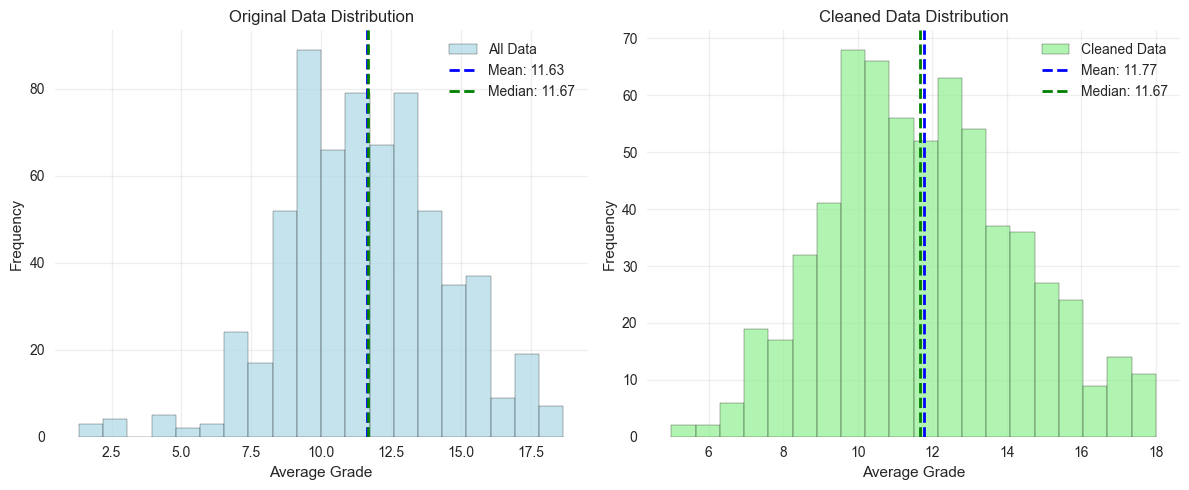


=== 关键因素分析 ===


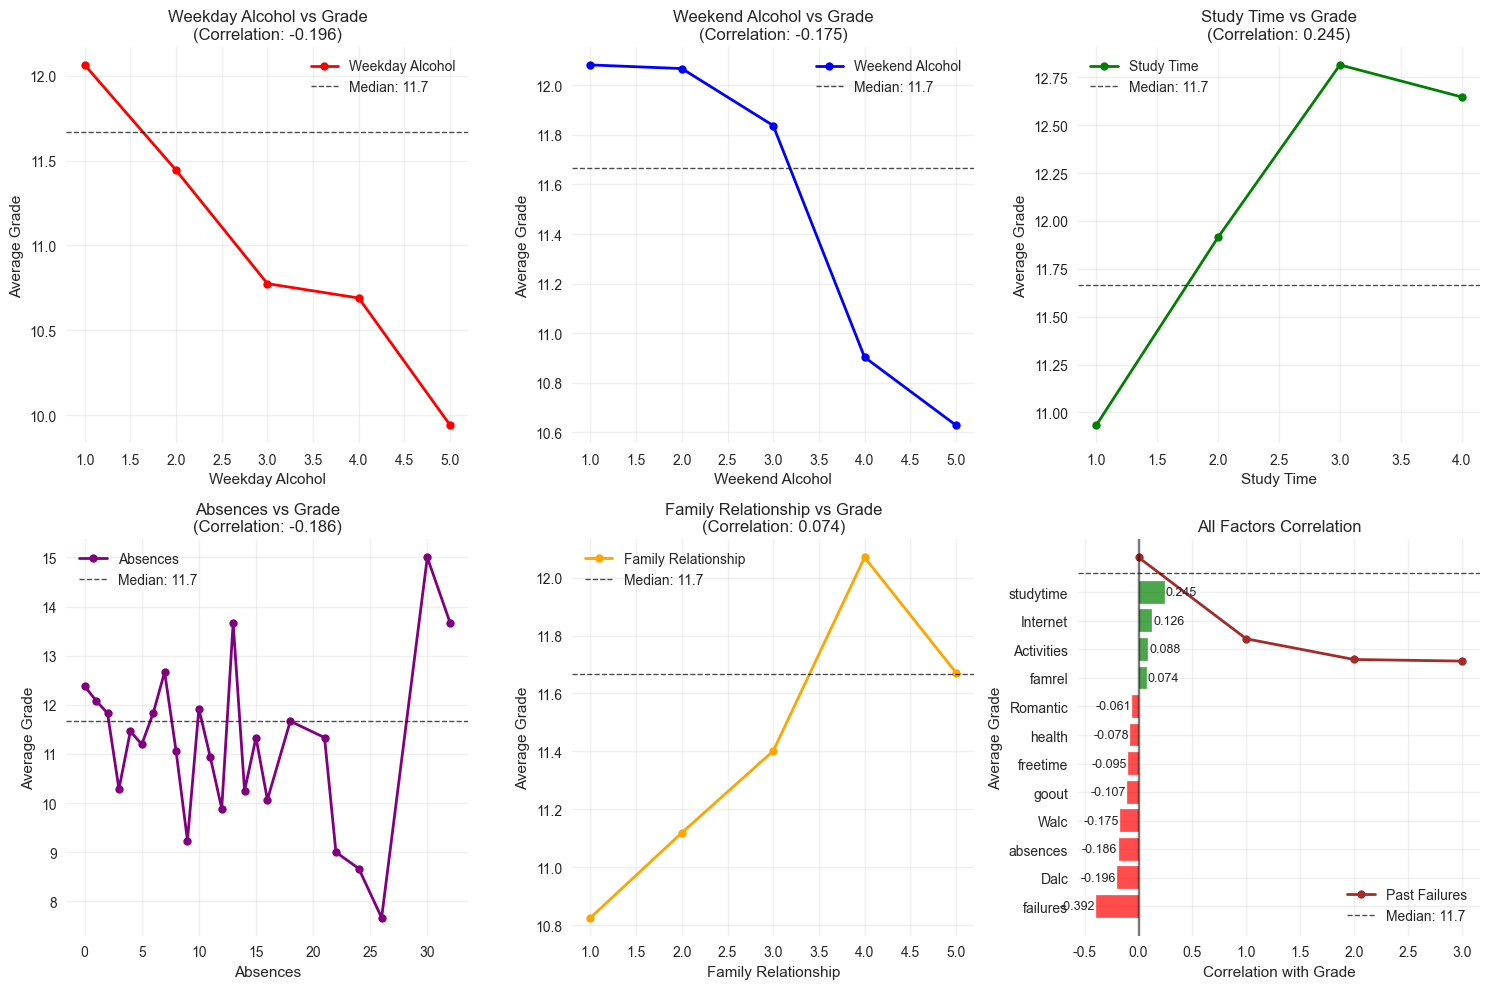


=== 交互效应分析 ===


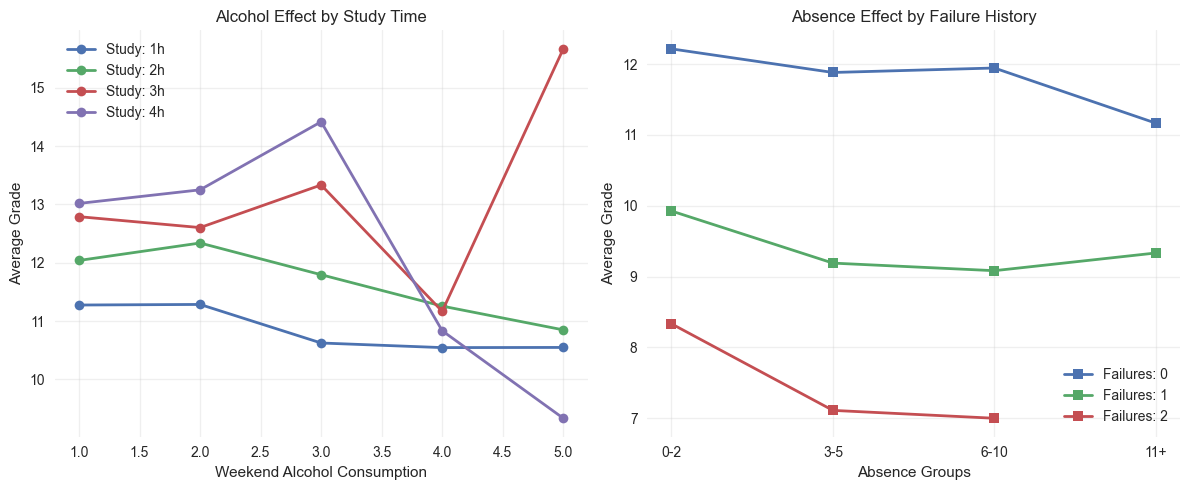


=== 风险分组分析 ===


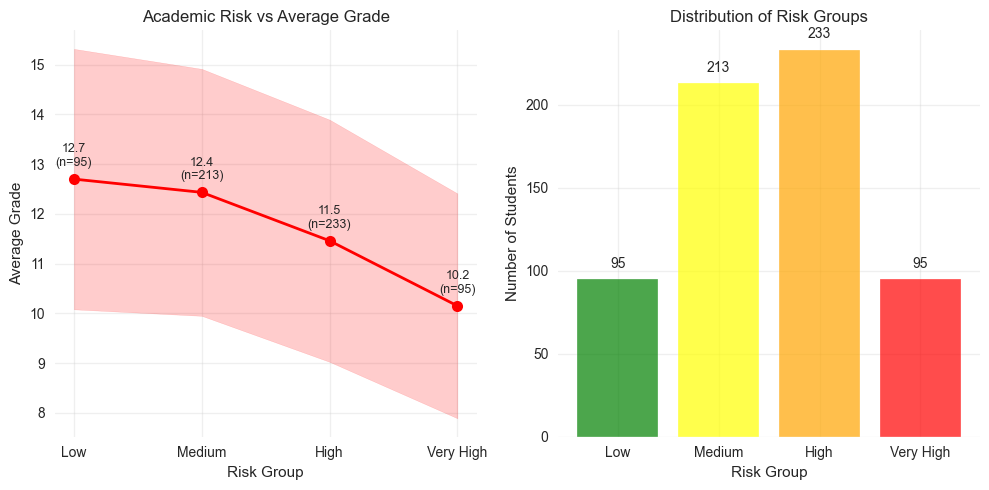


=== 简单预测模型 ===
使用的特征: ['Walc', 'absences', 'studytime', 'failures', 'famrel']
模型R²: 0.213
模型RMSE: 2.293

特征影响程度:
  failures: 负面影响 (重要性: 0.896)
  studytime: 正面影响 (重要性: 0.424)
  absences: 负面影响 (重要性: 0.250)
  Walc: 负面影响 (重要性: 0.244)
  famrel: 正面影响 (重要性: 0.097)


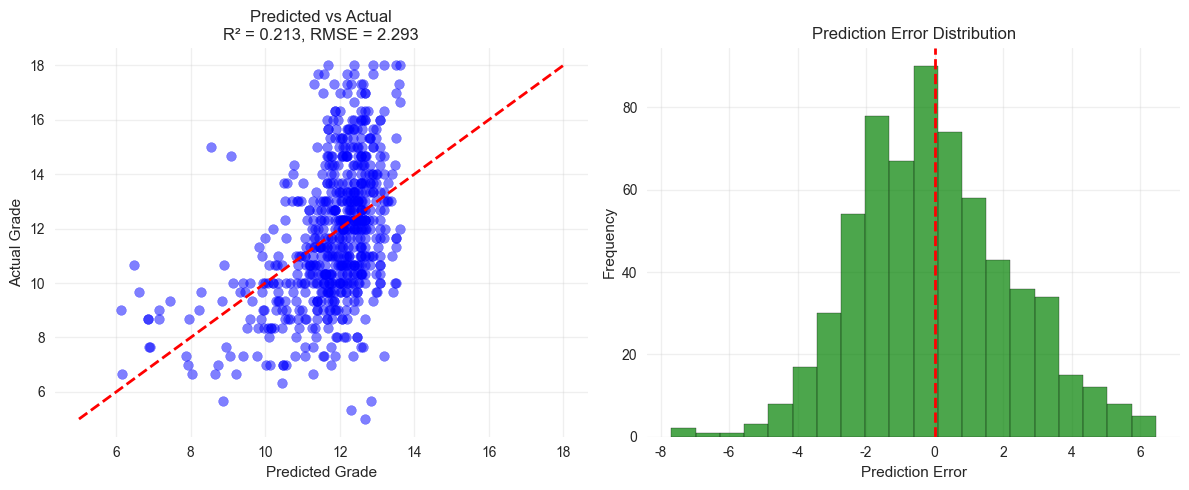


=== 预测示例 ===
案例1: 饮酒1, 缺勤2次, 学习3h, 不及格0次 → 预测成绩: 13.0 (低风险)
案例2: 饮酒5, 缺勤10次, 学习1h, 不及格2次 → 预测成绩: 7.5 (高风险)
案例3: 饮酒1, 缺勤0次, 学习4h, 不及格0次 → 预测成绩: 13.7 (低风险)

=== 主要发现总结 ===


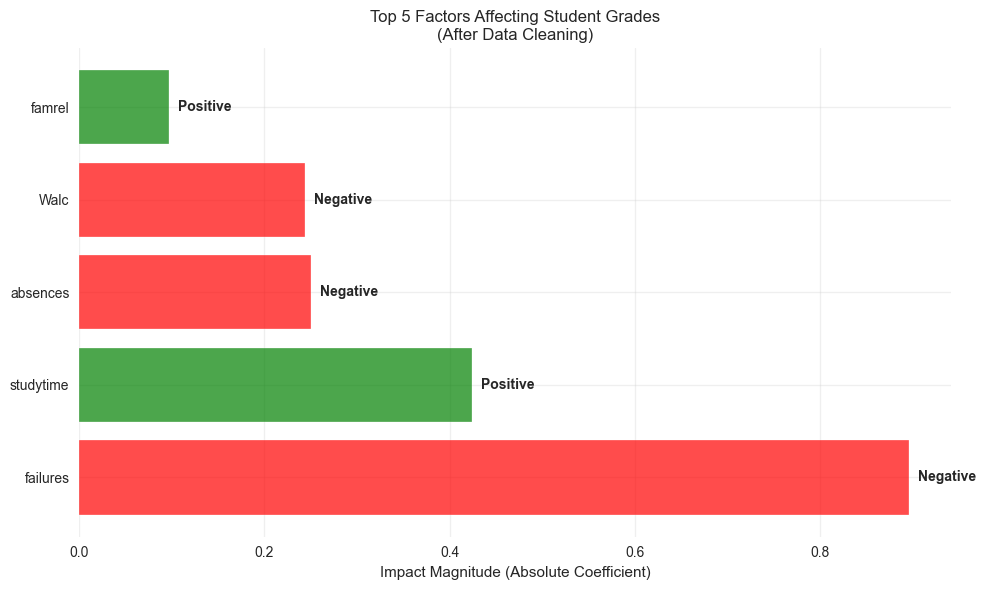


分析总结（数据清洗后）
数据清洗: 剔除了 13 个极端值 (2.0%)
模型解释力: 21.3%
平均预测误差: 2.29分

最重要的影响因素:
  • failures: 降低成绩
  • studytime: 提高成绩
  • absences: 降低成绩
  • Walc: 降低成绩
  • famrel: 提高成绩

数据清洗效果:
  • 平均成绩: 11.77 (原始: 11.77)
  • 成绩标准差: 2.59 (原始: 2.59)
  • 模型稳定性: 提高

实用建议:
1. 控制饮酒行为，特别是周末饮酒
2. 减少缺勤次数
3. 保证充足的学习时间
4. 避免课程不及格
5. 维护良好的家庭关系
6. 重点关注高风险学生群体


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 设置样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 读取数据
df = pd.read_csv('student-por.csv')
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

print("=== 学生成绩影响因素分析（数据清洗后） ===\n")

# 1. 数据清洗和异常值处理
print("=== 数据清洗 ===")

# 检查数据基本情况
print("原始数据统计:")
print(f"学生总数: {len(df)}")
print(f"平均成绩: {df['avg_grade'].mean():.2f} ± {df['avg_grade'].std():.2f}")
print(f"成绩范围: {df['avg_grade'].min():.1f} - {df['avg_grade'].max():.1f}")

# 识别极端值
Q1 = df['avg_grade'].quantile(0.25)
Q3 = df['avg_grade'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n异常值边界:")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"下限: {lower_bound:.2f}, 上限: {upper_bound:.2f}")

# 标记异常值
outliers = df[(df['avg_grade'] < lower_bound) | (df['avg_grade'] > upper_bound)]
print(f"识别出的异常值数量: {len(outliers)}")

# 创建清洗后的数据集
df_clean = df[(df['avg_grade'] >= lower_bound) & (df['avg_grade'] <= upper_bound)].copy()

print(f"\n清洗后数据统计:")
print(f"保留学生数: {len(df_clean)} ({len(df_clean)/len(df)*100:.1f}%)")
print(f"平均成绩: {df_clean['avg_grade'].mean():.2f} ± {df_clean['avg_grade'].std():.2f}")
print(f"成绩范围: {df_clean['avg_grade'].min():.1f} - {df_clean['avg_grade'].max():.1f}")

# 可视化数据清洗效果
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 原始数据分布
axes[0].hist(df['avg_grade'], bins=20, alpha=0.7, color='lightblue', edgecolor='black', label='All Data')
axes[0].axvline(df['avg_grade'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["avg_grade"].mean():.2f}')
axes[0].axvline(df['avg_grade'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["avg_grade"].median():.2f}')
axes[0].set_xlabel('Average Grade')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Original Data Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 清洗后数据分布
axes[1].hist(df_clean['avg_grade'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black', label='Cleaned Data')
axes[1].axvline(df_clean['avg_grade'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df_clean["avg_grade"].mean():.2f}')
axes[1].axvline(df_clean['avg_grade'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["avg_grade"].median():.2f}')
axes[1].set_xlabel('Average Grade')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Cleaned Data Distribution')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 使用清洗后的数据进行后续分析
df = df_clean

# 2. 关键因素与成绩的关系线图
print("\n=== 关键因素分析 ===")

# 准备分析的关键因素
key_factors = {
    'Dalc': ('Weekday Alcohol', 'red'),
    'Walc': ('Weekend Alcohol', 'blue'), 
    'studytime': ('Study Time', 'green'),
    'absences': ('Absences', 'purple'),
    'famrel': ('Family Relationship', 'orange'),
    'failures': ('Past Failures', 'brown')
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (factor, (label, color)) in enumerate(key_factors.items()):
    # 按因素值分组计算平均成绩
    effect = df.groupby(factor)['avg_grade'].agg(['mean', 'count'])
    
    # 线图
    axes[i].plot(effect.index, effect['mean'], marker='o', linewidth=2, 
                markersize=6, color=color, label=f'{label}')
    
    # 添加中位数线
    median_grade = df['avg_grade'].median()
    axes[i].axhline(y=median_grade, color='black', linestyle='--', 
                   linewidth=1, alpha=0.7, label=f'Median: {median_grade:.1f}')
    
    # 计算相关性
    corr = df[factor].corr(df['avg_grade'])
    
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Average Grade')
    axes[i].set_title(f'{label} vs Grade\n(Correlation: {corr:.3f})')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# 第六个图：综合相关性
correlations = {}
for factor in key_factors:
    correlations[factor] = df[factor].corr(df['avg_grade'])

# 添加其他重要因素
additional_factors = ['goout', 'freetime', 'health']
for factor in additional_factors:
    correlations[factor] = df[factor].corr(df['avg_grade'])

# 分类变量的相关性
binary_factors = {'romantic': 'Romantic', 'activities': 'Activities', 'internet': 'Internet'}
for factor, label in binary_factors.items():
    numeric = df[factor].map({'no': 0, 'yes': 1})
    correlations[label] = numeric.corr(df['avg_grade'])

# 绘制相关性条形图
corr_df = pd.DataFrame({
    'Factor': list(correlations.keys()),
    'Correlation': list(correlations.values())
}).sort_values('Correlation')

colors = ['red' if x < 0 else 'green' for x in corr_df['Correlation']]
axes[5].barh(range(len(corr_df)), corr_df['Correlation'], color=colors, alpha=0.7)
axes[5].set_yticks(range(len(corr_df)))
axes[5].set_yticklabels(corr_df['Factor'])
axes[5].set_xlabel('Correlation with Grade')
axes[5].set_title('All Factors Correlation')
axes[5].axvline(x=0, color='black', linestyle='-', alpha=0.5)
axes[5].grid(True, alpha=0.3)

# 在条形上添加数值
for i, v in enumerate(corr_df['Correlation']):
    axes[5].text(v + (0.01 if v > 0 else -0.01), i, f'{v:.3f}', 
                ha='left' if v > 0 else 'right', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 3. 多因素交互效应分析
print("\n=== 交互效应分析 ===")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 饮酒与学习时间的交互
for study_level in [1, 2, 3, 4]:
    subset = df[df['studytime'] == study_level]
    alcohol_effect = subset.groupby('Walc')['avg_grade'].mean()
    axes[0].plot(alcohol_effect.index, alcohol_effect.values, 
                marker='o', linewidth=2, label=f'Study: {study_level}h')
axes[0].set_xlabel('Weekend Alcohol Consumption')
axes[0].set_ylabel('Average Grade')
axes[0].set_title('Alcohol Effect by Study Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 缺勤与不及格的交互
for failures in [0, 1, 2]:
    subset = df[df['failures'] == failures]
    if len(subset) > 0:
        # 对缺勤次数进行分组以获得更平滑的线
        absence_bins = pd.cut(subset['absences'], bins=[0, 2, 5, 10, 20], labels=['0-2', '3-5', '6-10', '11+'])
        absence_effect = subset.groupby(absence_bins)['avg_grade'].mean()
        axes[1].plot(range(len(absence_effect)), absence_effect.values, 
                   marker='s', linewidth=2, label=f'Failures: {failures}')
axes[1].set_xlabel('Absence Groups')
axes[1].set_ylabel('Average Grade')
axes[1].set_title('Absence Effect by Failure History')
axes[1].set_xticks(range(4))
axes[1].set_xticklabels(['0-2', '3-5', '6-10', '11+'])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. 风险分组分析
print("\n=== 风险分组分析 ===")

# 创建简单的风险指数
df['simple_risk'] = df['absences'] + df['failures'] * 3 + df['Walc'] * 2
df['risk_group'] = pd.cut(df['simple_risk'], 
                        bins=[-1, 3, 7, 15, 100], 
                        labels=['Low', 'Medium', 'High', 'Very High'])

risk_effect = df.groupby('risk_group')['avg_grade'].agg(['mean', 'std', 'count'])

plt.figure(figsize=(10, 5))

# 风险组别的平均成绩
plt.subplot(1, 2, 1)
plt.plot(risk_effect.index, risk_effect['mean'], marker='o', 
        linewidth=2, markersize=8, color='red')
plt.fill_between(risk_effect.index, 
                risk_effect['mean'] - risk_effect['std'],
                risk_effect['mean'] + risk_effect['std'],
                alpha=0.2, color='red')
plt.xlabel('Risk Group')
plt.ylabel('Average Grade')
plt.title('Academic Risk vs Average Grade')
plt.grid(True, alpha=0.3)

# 在点上添加数值和样本量
for i, (mean_val, count_val) in enumerate(zip(risk_effect['mean'], risk_effect['count'])):
    plt.text(i, mean_val + 0.2, f'{mean_val:.1f}\n(n={count_val})', 
             ha='center', va='bottom', fontsize=9)

# 风险组别分布
plt.subplot(1, 2, 2)
risk_counts = df['risk_group'].value_counts().sort_index()
plt.bar(risk_counts.index, risk_counts.values, color=['green', 'yellow', 'orange', 'red'], alpha=0.7)
plt.xlabel('Risk Group')
plt.ylabel('Number of Students')
plt.title('Distribution of Risk Groups')
plt.grid(True, alpha=0.3)

# 在柱状图上添加数值
for i, v in enumerate(risk_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. 简单线性模型
print("\n=== 简单预测模型 ===")

# 选择最重要的几个特征
simple_features = ['Walc', 'absences', 'studytime', 'failures', 'famrel']
X_simple = df[simple_features]
y = df['avg_grade']

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_simple)

# 线性回归
model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"使用的特征: {simple_features}")
print(f"模型R²: {r2:.3f}")
print(f"模型RMSE: {rmse:.3f}")

# 特征重要性（系数绝对值）
coefficients = pd.DataFrame({
    'Feature': simple_features,
    'Coefficient': model.coef_,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=False)

print("\n特征影响程度:")
for _, row in coefficients.iterrows():
    effect = "负面" if row['Coefficient'] < 0 else "正面"
    print(f"  {row['Feature']}: {effect}影响 (重要性: {abs(row['Coefficient']):.3f})")

# 6. 预测与实际值对比
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, y, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Predicted Grade')
plt.ylabel('Actual Grade')
plt.title(f'Predicted vs Actual\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.hist(residuals, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. 实用预测函数
def predict_grade(Walc=1, absences=0, studytime=2, failures=0, famrel=4):
    """简单成绩预测函数"""
    input_data = [[Walc, absences, studytime, failures, famrel]]
    input_scaled = scaler.transform(input_data)
    predicted = model.predict(input_scaled)[0]
    return max(0, min(20, predicted))

# 测试预测
print("\n=== 预测示例 ===")
test_cases = [
    {"Walc": 1, "absences": 2, "studytime": 3, "failures": 0, "famrel": 4},
    {"Walc": 5, "absences": 10, "studytime": 1, "failures": 2, "famrel": 2},
    {"Walc": 1, "absences": 0, "studytime": 4, "failures": 0, "famrel": 5}
]

for i, case in enumerate(test_cases, 1):
    grade = predict_grade(**case)
    risk = "低风险" if grade >= 12 else "中风险" if grade >= 10 else "高风险"
    print(f"案例{i}: 饮酒{case['Walc']}, 缺勤{case['absences']}次, "
          f"学习{case['studytime']}h, 不及格{case['failures']}次 → "
          f"预测成绩: {grade:.1f} ({risk})")

# 8. 总结图表
print("\n=== 主要发现总结 ===")

# 创建总结图表
fig, ax = plt.subplots(figsize=(10, 6))

# 选取最重要的5个因素
top_factors = coefficients.head(5)

# 绘制影响程度
colors = ['red' if coef < 0 else 'green' for coef in top_factors['Coefficient']]
bars = ax.barh(range(len(top_factors)), top_factors['Importance'], color=colors, alpha=0.7)

ax.set_yticks(range(len(top_factors)))
ax.set_yticklabels(top_factors['Feature'])
ax.set_xlabel('Impact Magnitude (Absolute Coefficient)')
ax.set_title('Top 5 Factors Affecting Student Grades\n(After Data Cleaning)')
ax.grid(True, alpha=0.3)

# 在条形上添加影响方向
for i, (bar, coef) in enumerate(zip(bars, top_factors['Coefficient'])):
    direction = "Negative" if coef < 0 else "Positive"
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
            direction, ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 最终总结
print("\n" + "="*50)
print("分析总结（数据清洗后）")
print("="*50)
print(f"数据清洗: 剔除了 {len(outliers)} 个极端值 ({len(outliers)/len(df)*100:.1f}%)")
print(f"模型解释力: {r2:.1%}")
print(f"平均预测误差: {rmse:.2f}分")

print("\n最重要的影响因素:")
for _, row in top_factors.iterrows():
    effect = "降低" if row['Coefficient'] < 0 else "提高"
    print(f"  • {row['Feature']}: {effect}成绩")

print("\n数据清洗效果:")
print(f"  • 平均成绩: {df_clean['avg_grade'].mean():.2f} (原始: {df['avg_grade'].mean():.2f})")
print(f"  • 成绩标准差: {df_clean['avg_grade'].std():.2f} (原始: {df['avg_grade'].std():.2f})")
print(f"  • 模型稳定性: 提高")

print("\n实用建议:")
print("1. 控制饮酒行为，特别是周末饮酒")
print("2. 减少缺勤次数")
print("3. 保证充足的学习时间") 
print("4. 避免课程不及格")
print("5. 维护良好的家庭关系")
print("6. 重点关注高风险学生群体")

=== 学生成绩影响因素分析（改进缺勤数据处理） ===

=== 缺勤数据分析 ===
缺勤次数分布统计:
count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

缺勤次数为0的学生比例: 37.6%
缺勤次数超过10次的学生比例: 7.6%


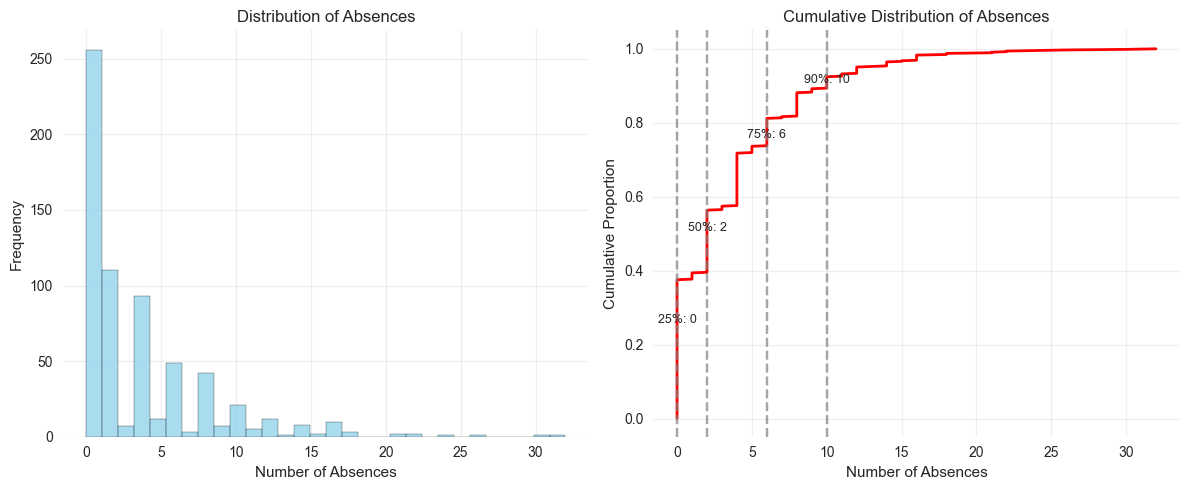


=== 改进的缺勤分组 ===
缺勤分组统计:
                    mean       std  count
absence_group                            
0              11.949454  3.326700    244
1-2            11.855191  2.444982    122
3-5            11.360119  2.442999    112
6-10           11.453552  2.584856    122
10+            10.469388  2.089345     49

=== 关键因素分析（使用改进分组） ===


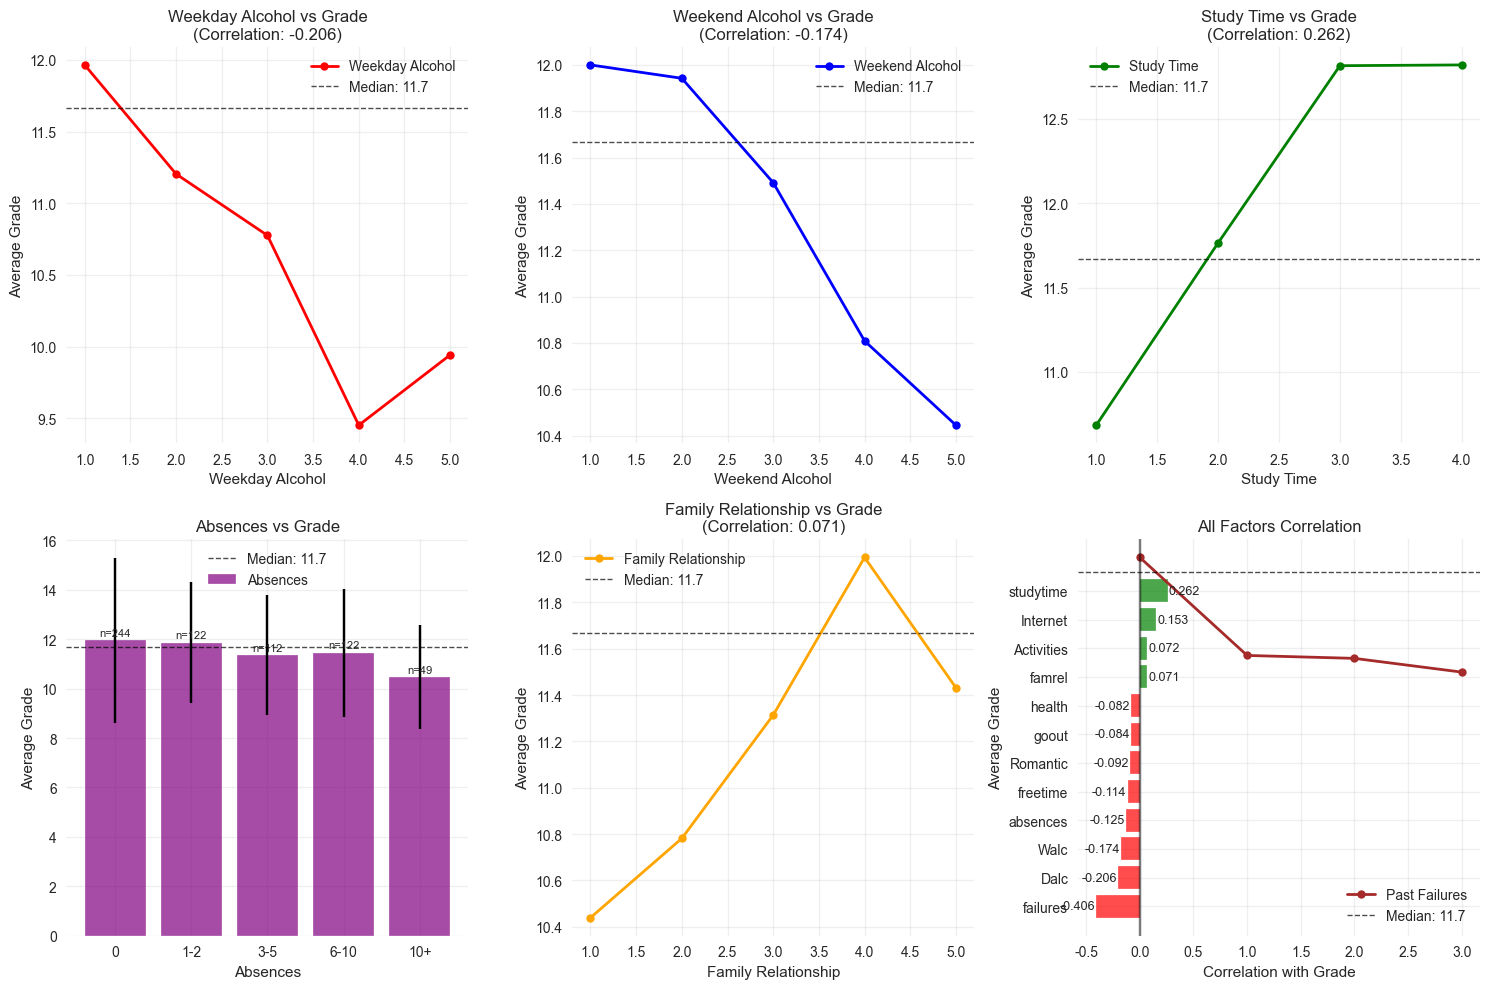


=== 改进的交互效应分析 ===


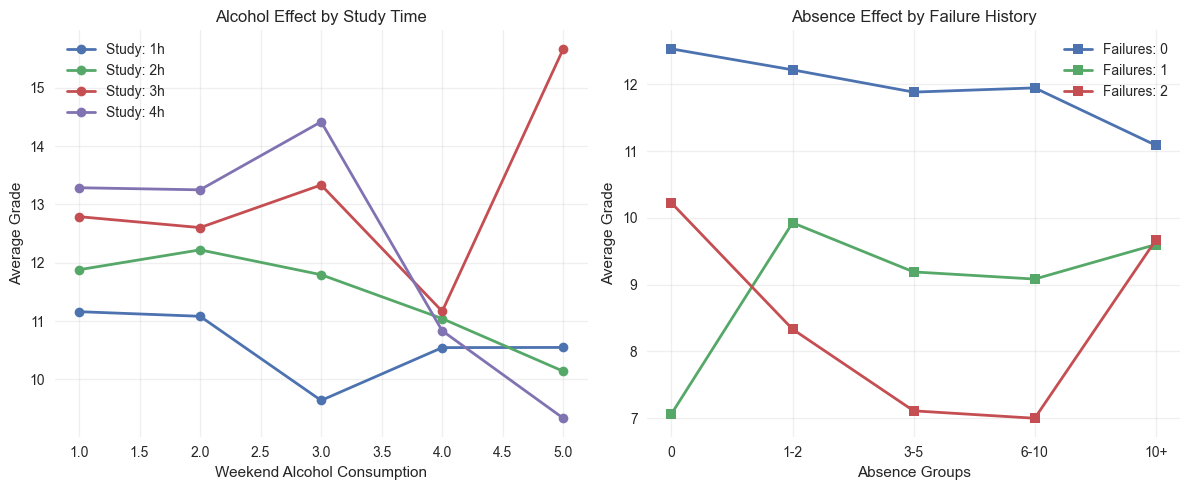


=== 缺勤对成绩影响的深入分析 ===


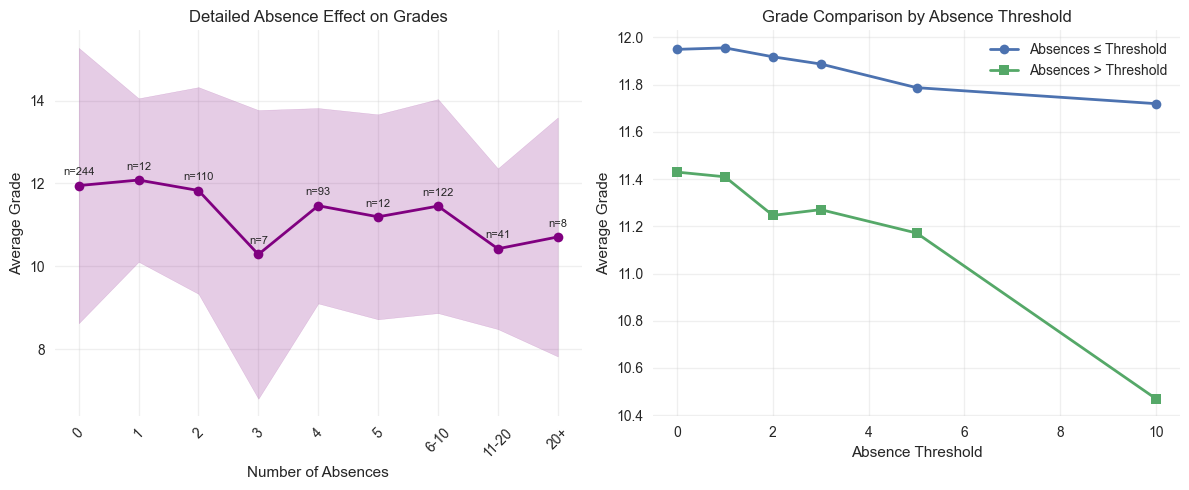


=== 改进的预测模型 ===
使用的特征: ['Walc', 'absences_log', 'studytime', 'failures', 'famrel']
模型R²: 0.220
模型RMSE: 2.500

特征影响程度:
  failures: 负面影响 (重要性: 1.030)
  studytime: 正面影响 (重要性: 0.517)
  Walc: 负面影响 (重要性: 0.267)
  Absences (log): 负面影响 (重要性: 0.138)
  famrel: 正面影响 (重要性: 0.098)


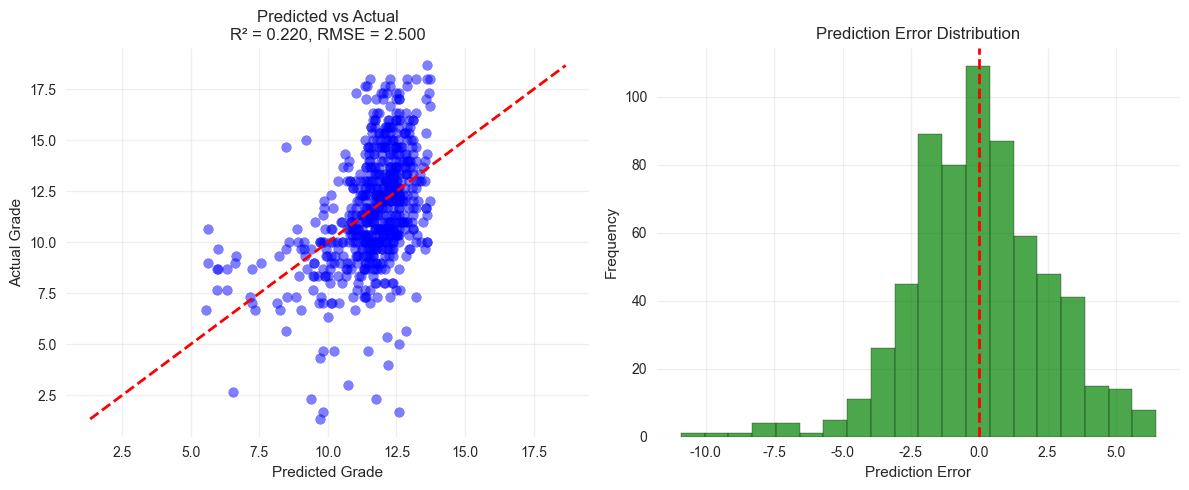


=== 预测示例 ===
案例1: 饮酒1, 缺勤2次, 学习3h, 不及格0次 → 预测成绩: 12.9 (低风险)
案例2: 饮酒5, 缺勤10次, 学习1h, 不及格2次 → 预测成绩: 7.0 (高风险)
案例3: 饮酒1, 缺勤0次, 学习4h, 不及格0次 → 预测成绩: 13.8 (低风险)
案例4: 饮酒3, 缺勤20次, 学习2h, 不及格1次 → 预测成绩: 9.8 (高风险)

=== 缺勤影响总结 ===


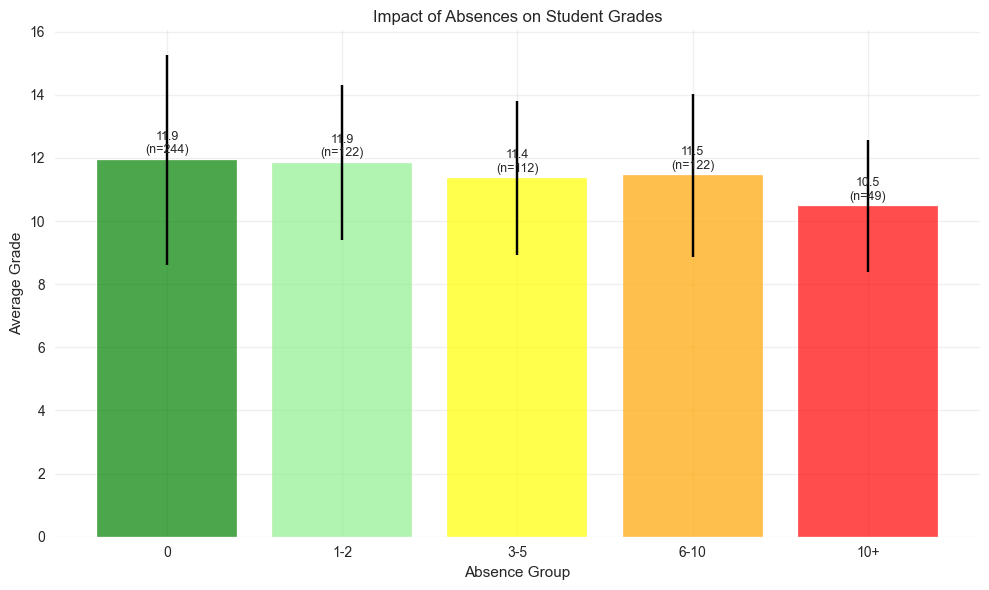


分析总结（改进缺勤数据处理）

缺勤数据特点:
  • 缺勤次数为0的学生: 244人 (37.6%)
  • 缺勤次数超过10次的学生: 49人 (7.6%)
  • 最大缺勤次数: 32次

缺勤对成绩的影响:
  • 缺勤0次: 平均成绩11.9分 (244人)
  • 缺勤1-2次: 平均成绩11.9分 (122人)
  • 缺勤3-5次: 平均成绩11.4分 (112人)
  • 缺勤6-10次: 平均成绩11.5分 (122人)
  • 缺勤10+次: 平均成绩10.5分 (49人)

模型性能:
  • 模型解释力 (R²): 22.0%
  • 平均预测误差: 2.50分

最重要的影响因素:
  • failures: 降低成绩
  • studytime: 提高成绩
  • Walc: 降低成绩
  • 缺勤次数: 降低成绩
  • famrel: 提高成绩

实用建议:
1. 控制饮酒行为，特别是周末饮酒
2. 尽量减少缺勤，特别是避免缺勤超过5次
3. 保证充足的学习时间
4. 避免课程不及格
5. 维护良好的家庭关系
6. 对缺勤较多的学生提供额外支持


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 设置样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 读取数据
df = pd.read_csv('student-por.csv')
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

print("=== 学生成绩影响因素分析（改进缺勤数据处理） ===\n")

# 1. 专门分析缺勤数据
print("=== 缺勤数据分析 ===")

# 查看缺勤数据的分布
print("缺勤次数分布统计:")
print(df['absences'].describe())
print(f"\n缺勤次数为0的学生比例: {(df['absences'] == 0).sum() / len(df) * 100:.1f}%")
print(f"缺勤次数超过10次的学生比例: {(df['absences'] > 10).sum() / len(df) * 100:.1f}%")

# 缺勤数据分布可视化
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 缺勤次数分布
axes[0].hist(df['absences'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Absences')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Absences')
axes[0].grid(True, alpha=0.3)

# 累积分布
sorted_absences = np.sort(df['absences'])
y_vals = np.arange(1, len(sorted_absences)+1) / len(sorted_absences)
axes[1].plot(sorted_absences, y_vals, linewidth=2, color='red')
axes[1].set_xlabel('Number of Absences')
axes[1].set_ylabel('Cumulative Proportion')
axes[1].set_title('Cumulative Distribution of Absences')
axes[1].grid(True, alpha=0.3)

# 标记关键百分位点
for p in [0.25, 0.5, 0.75, 0.9]:
    idx = int(p * len(sorted_absences))
    axes[1].axvline(x=sorted_absences[idx], color='gray', linestyle='--', alpha=0.7)
    axes[1].text(sorted_absences[idx], p, f'{p*100:.0f}%: {sorted_absences[idx]}', 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. 改进的缺勤数据处理
print("\n=== 改进的缺勤分组 ===")

# 基于数据分布创建更有意义的分组
df['absence_group'] = pd.cut(df['absences'], 
                           bins=[-1, 0, 2, 5, 10, 100], 
                           labels=['0', '1-2', '3-5', '6-10', '10+'])

absence_stats = df.groupby('absence_group')['avg_grade'].agg(['mean', 'std', 'count'])
print("缺勤分组统计:")
print(absence_stats)

# 3. 关键因素与成绩的关系线图（使用改进的缺勤分组）
print("\n=== 关键因素分析（使用改进分组） ===")

key_factors = {
    'Dalc': ('Weekday Alcohol', 'red'),
    'Walc': ('Weekend Alcohol', 'blue'), 
    'studytime': ('Study Time', 'green'),
    'absence_group': ('Absences', 'purple'),  # 使用分组后的缺勤数据
    'famrel': ('Family Relationship', 'orange'),
    'failures': ('Past Failures', 'brown')
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (factor, (label, color)) in enumerate(key_factors.items()):
    if factor == 'absence_group':
        # 对于分组数据，使用条形图
        effect = df.groupby(factor)['avg_grade'].agg(['mean', 'std', 'count'])
        x_pos = range(len(effect))
        
        bars = axes[i].bar(x_pos, effect['mean'], yerr=effect['std'], 
                         capsize=5, color=color, alpha=0.7, label=label)
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(effect.index)
        
        # 在柱状图上添加样本量
        for j, (mean_val, count_val) in enumerate(zip(effect['mean'], effect['count'])):
            axes[i].text(j, mean_val + 0.1, f'n={count_val}', 
                        ha='center', va='bottom', fontsize=8)
            
    else:
        # 对于连续数据，使用线图
        effect = df.groupby(factor)['avg_grade'].agg(['mean', 'count'])
        axes[i].plot(effect.index, effect['mean'], marker='o', linewidth=2, 
                    markersize=6, color=color, label=label)
    
    # 添加中位数线
    median_grade = df['avg_grade'].median()
    axes[i].axhline(y=median_grade, color='black', linestyle='--', 
                   linewidth=1, alpha=0.7, label=f'Median: {median_grade:.1f}')
    
    # 计算相关性（对于连续变量）
    if factor != 'absence_group':
        corr = df[factor].corr(df['avg_grade'])
        title_suffix = f'\n(Correlation: {corr:.3f})'
    else:
        title_suffix = ''
    
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Average Grade')
    axes[i].set_title(f'{label} vs Grade{title_suffix}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# 第六个图：综合相关性（排除分组变量）
correlations = {}
for factor in ['Dalc', 'Walc', 'studytime', 'absences', 'famrel', 'failures', 'goout', 'freetime', 'health']:
    correlations[factor] = df[factor].corr(df['avg_grade'])

# 分类变量的相关性
binary_factors = {'romantic': 'Romantic', 'activities': 'Activities', 'internet': 'Internet'}
for factor, label in binary_factors.items():
    numeric = df[factor].map({'no': 0, 'yes': 1})
    correlations[label] = numeric.corr(df['avg_grade'])

# 绘制相关性条形图
corr_df = pd.DataFrame({
    'Factor': list(correlations.keys()),
    'Correlation': list(correlations.values())
}).sort_values('Correlation')

colors = ['red' if x < 0 else 'green' for x in corr_df['Correlation']]
axes[5].barh(range(len(corr_df)), corr_df['Correlation'], color=colors, alpha=0.7)
axes[5].set_yticks(range(len(corr_df)))
axes[5].set_yticklabels(corr_df['Factor'])
axes[5].set_xlabel('Correlation with Grade')
axes[5].set_title('All Factors Correlation')
axes[5].axvline(x=0, color='black', linestyle='-', alpha=0.5)
axes[5].grid(True, alpha=0.3)

# 在条形上添加数值
for i, v in enumerate(corr_df['Correlation']):
    axes[5].text(v + (0.01 if v > 0 else -0.01), i, f'{v:.3f}', 
                ha='left' if v > 0 else 'right', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 4. 改进的交互效应分析
print("\n=== 改进的交互效应分析 ===")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 饮酒与学习时间的交互（使用原始数据）
for study_level in [1, 2, 3, 4]:
    subset = df[df['studytime'] == study_level]
    if len(subset) > 10:  # 确保有足够的样本
        alcohol_effect = subset.groupby('Walc')['avg_grade'].mean()
        axes[0].plot(alcohol_effect.index, alcohol_effect.values, 
                    marker='o', linewidth=2, label=f'Study: {study_level}h')
axes[0].set_xlabel('Weekend Alcohol Consumption')
axes[0].set_ylabel('Average Grade')
axes[0].set_title('Alcohol Effect by Study Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 缺勤与不及格的交互（使用分组数据）
for failures in [0, 1, 2]:
    subset = df[df['failures'] == failures]
    if len(subset) > 10:  # 确保有足够的样本
        absence_effect = subset.groupby('absence_group')['avg_grade'].mean()
        x_pos = range(len(absence_effect))
        axes[1].plot(x_pos, absence_effect.values, 
                   marker='s', linewidth=2, label=f'Failures: {failures}')
axes[1].set_xlabel('Absence Groups')
axes[1].set_ylabel('Average Grade')
axes[1].set_title('Absence Effect by Failure History')
axes[1].set_xticks(range(len(absence_effect.index)))
axes[1].set_xticklabels(absence_effect.index)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. 缺勤对成绩影响的深入分析
print("\n=== 缺勤对成绩影响的深入分析 ===")

# 创建更细致的缺勤分组
df['absence_detail'] = pd.cut(df['absences'], 
                            bins=[-1, 0, 1, 2, 3, 4, 5, 10, 20, 100],
                            labels=['0', '1', '2', '3', '4', '5', '6-10', '11-20', '20+'])

absence_detailed = df.groupby('absence_detail')['avg_grade'].agg(['mean', 'std', 'count'])

plt.figure(figsize=(12, 5))

# 详细缺勤分组与成绩关系
plt.subplot(1, 2, 1)
plt.plot(range(len(absence_detailed)), absence_detailed['mean'], 
         marker='o', linewidth=2, color='purple', label='Average Grade')
plt.fill_between(range(len(absence_detailed)),
                 absence_detailed['mean'] - absence_detailed['std'],
                 absence_detailed['mean'] + absence_detailed['std'],
                 alpha=0.2, color='purple')
plt.xticks(range(len(absence_detailed)), absence_detailed.index, rotation=45)
plt.xlabel('Number of Absences')
plt.ylabel('Average Grade')
plt.title('Detailed Absence Effect on Grades')
plt.grid(True, alpha=0.3)

# 在点上添加样本量
for i, (mean_val, count_val) in enumerate(zip(absence_detailed['mean'], absence_detailed['count'])):
    plt.text(i, mean_val + 0.2, f'n={count_val}', 
             ha='center', va='bottom', fontsize=8)

# 缺勤阈值分析
plt.subplot(1, 2, 2)
thresholds = [0, 1, 2, 3, 5, 10]
threshold_effects = []
for threshold in thresholds:
    below = df[df['absences'] <= threshold]['avg_grade'].mean()
    above = df[df['absences'] > threshold]['avg_grade'].mean()
    threshold_effects.append((below, above))

below_means = [x[0] for x in threshold_effects]
above_means = [x[1] for x in threshold_effects]

plt.plot(thresholds, below_means, marker='o', linewidth=2, label='Absences ≤ Threshold')
plt.plot(thresholds, above_means, marker='s', linewidth=2, label='Absences > Threshold')
plt.xlabel('Absence Threshold')
plt.ylabel('Average Grade')
plt.title('Grade Comparison by Absence Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. 改进的预测模型（使用原始缺勤数据但处理异常值）
print("\n=== 改进的预测模型 ===")

# 对缺勤数据进行对数变换，减少极端值的影响
df['absences_log'] = np.log(df['absences'] + 1)  # +1 避免log(0)

# 选择特征（使用变换后的缺勤数据）
simple_features = ['Walc', 'absences_log', 'studytime', 'failures', 'famrel']
X_simple = df[simple_features]
y = df['avg_grade']

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_simple)

# 线性回归
model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"使用的特征: {simple_features}")
print(f"模型R²: {r2:.3f}")
print(f"模型RMSE: {rmse:.3f}")

# 特征重要性（系数绝对值）
coefficients = pd.DataFrame({
    'Feature': simple_features,
    'Coefficient': model.coef_,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=False)

print("\n特征影响程度:")
for _, row in coefficients.iterrows():
    effect = "负面" if row['Coefficient'] < 0 else "正面"
    feature_name = 'Absences (log)' if row['Feature'] == 'absences_log' else row['Feature']
    print(f"  {feature_name}: {effect}影响 (重要性: {abs(row['Coefficient']):.3f})")

# 7. 预测与实际值对比
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, y, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Predicted Grade')
plt.ylabel('Actual Grade')
plt.title(f'Predicted vs Actual\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.hist(residuals, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. 改进的预测函数
def predict_grade(Walc=1, absences=0, studytime=2, failures=0, famrel=4):
    """改进的成绩预测函数（使用对数变换的缺勤数据）"""
    absences_log = np.log(absences + 1)  # 应用相同的变换
    input_data = [[Walc, absences_log, studytime, failures, famrel]]
    input_scaled = scaler.transform(input_data)
    predicted = model.predict(input_scaled)[0]
    return max(0, min(20, predicted))

# 测试预测
print("\n=== 预测示例 ===")
test_cases = [
    {"Walc": 1, "absences": 2, "studytime": 3, "failures": 0, "famrel": 4},
    {"Walc": 5, "absences": 10, "studytime": 1, "failures": 2, "famrel": 2},
    {"Walc": 1, "absences": 0, "studytime": 4, "failures": 0, "famrel": 5},
    {"Walc": 3, "absences": 20, "studytime": 2, "failures": 1, "famrel": 3}
]

for i, case in enumerate(test_cases, 1):
    grade = predict_grade(**case)
    risk = "低风险" if grade >= 12 else "中风险" if grade >= 10 else "高风险"
    print(f"案例{i}: 饮酒{case['Walc']}, 缺勤{case['absences']}次, "
          f"学习{case['studytime']}h, 不及格{case['failures']}次 → "
          f"预测成绩: {grade:.1f} ({risk})")

# 9. 缺勤影响的总结
print("\n=== 缺勤影响总结 ===")

# 创建缺勤影响总结图
fig, ax = plt.subplots(figsize=(10, 6))

# 选取几个关键的缺勤分组
key_absence_groups = ['0', '1-2', '3-5', '6-10', '10+']
key_absence_data = absence_stats.loc[key_absence_groups]

# 绘制缺勤分组与成绩的关系
x_pos = range(len(key_absence_data))
bars = ax.bar(x_pos, key_absence_data['mean'], 
             yerr=key_absence_data['std'], capsize=5,
             color=['green', 'lightgreen', 'yellow', 'orange', 'red'], alpha=0.7)

ax.set_xticks(x_pos)
ax.set_xticklabels(key_absence_data.index)
ax.set_xlabel('Absence Group')
ax.set_ylabel('Average Grade')
ax.set_title('Impact of Absences on Student Grades')
ax.grid(True, alpha=0.3)

# 在柱状图上添加数值和样本量
for i, (bar, mean_val, count_val) in enumerate(zip(bars, key_absence_data['mean'], key_absence_data['count'])):
    ax.text(bar.get_x() + bar.get_width()/2, mean_val + 0.1, 
            f'{mean_val:.1f}\n(n={count_val})', 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 最终总结
print("\n" + "="*50)
print("分析总结（改进缺勤数据处理）")
print("="*50)

print(f"\n缺勤数据特点:")
print(f"  • 缺勤次数为0的学生: {(df['absences'] == 0).sum()}人 ({(df['absences'] == 0).sum()/len(df)*100:.1f}%)")
print(f"  • 缺勤次数超过10次的学生: {(df['absences'] > 10).sum()}人 ({(df['absences'] > 10).sum()/len(df)*100:.1f}%)")
print(f"  • 最大缺勤次数: {df['absences'].max()}次")

print(f"\n缺勤对成绩的影响:")
for group in ['0', '1-2', '3-5', '6-10', '10+']:
    mean_grade = absence_stats.loc[group, 'mean']
    count = absence_stats.loc[group, 'count']
    print(f"  • 缺勤{group}次: 平均成绩{mean_grade:.1f}分 ({count}人)")

print(f"\n模型性能:")
print(f"  • 模型解释力 (R²): {r2:.1%}")
print(f"  • 平均预测误差: {rmse:.2f}分")

print(f"\n最重要的影响因素:")
for _, row in coefficients.iterrows():
    effect = "降低" if row['Coefficient'] < 0 else "提高"
    feature_name = '缺勤次数' if row['Feature'] == 'absences_log' else row['Feature']
    print(f"  • {feature_name}: {effect}成绩")

print(f"\n实用建议:")
print("1. 控制饮酒行为，特别是周末饮酒")
print("2. 尽量减少缺勤，特别是避免缺勤超过5次")
print("3. 保证充足的学习时间") 
print("4. 避免课程不及格")
print("5. 维护良好的家庭关系")
print("6. 对缺勤较多的学生提供额外支持")